<div style="text-align: center;">
  <h2>Airline On-Time Performance (2007)</h2>
  <h3>Azrul Zulhilmi bin Ahmad Rosli (P153478)</h3>
  <h3>Project 2<br>STQD6324 - Data Management<br>Semester 2 2024/2025</h3>
</div>


## Introduction
This project is using "Data Expo 2009: Airline On Time Data" dataset from Kaggle. The goal is to uncover insights related to flight delays and cancellations across U.S. airlines and airports. The analysis is conducted using Apache Hive on a Hadoop environment managed via Ambari, with Python used for data visualization and reporting.

This project demonstrates practical skills in integrating big data platforms with Python analytics, performing large-scale SQL-based queries, and visualizing complex aviation trends.

### Commercial Airlines Outlook 2007 
The U.S. commercial airline industry in 2007 faced a range of operational and financial challenges that put pressure on overall performance. Escalating fuel prices significantly reduced profit margins, prompting many airlines to increase ticket fares to compensate for rising costs.

Following the 9/11 incident, regulatory changes and heightened security protocols continued to affect both operational efficiency and the passenger experience. Airlines also faced fluctuating demand, influenced by economic uncertainty and growing competition from low-cost carriers.

Adding to these difficulties were frequent weather-related disruptions and airport congestion, which contributed to a rise in flight delays and cancellations which lead to customer satisfaction. To address these challenges, airlines implemented strategic measures such as cost-cutting initiatives, investment in fuel-efficient aircraft, and improvements in customer service to remain competitive in a complex and evolving aviation landscape.


### Objectives
1. To examine patterns of flight delays across time of day, day of week, month, and season.
2. To identify and rank the major contributing factors to flight delays in terms of total minutes and percentage.
3. To analyze the primary reasons for flight cancellations and assess their relationship with specific airlines, airports, or time-period attributes.
4. To detect problematic flight routes and carriers based on high delay or cancellation rates.
5. To integrate HiveSQL and Python to perform big data analysis and generate visual insights from large-scale flight data.

### Problem Statement
The U.S. commercial airline industry in 2007 faced a surge of operational difficulties, including high fuel prices, stringent post-9/11 security protocols, unpredictable demand, and frequent weather disruptions. All contributing to significant flight delays and cancellations. Understanding the root causes and patterns of these delays is critical for improving airline performance and passenger experience. However, due to the scale and complexity of flight data, traditional tools fall short in extracting meaningful insights. This project leverages Apache Hive on Hadoop and Python to analyze the 2007 Airline On-Time Performance dataset in order to identify patterns, quantify delay causes, and uncover operational weaknesses across carriers, airports, and routes.

### Data Background

The dataset includes flight records for the entire year from Octorber 1987 to April 2008. It enriched by joining with metadata tables such as airports.csv, carriers.csv and plane data.csv which resulting in a unified Hive table named enriched_2007. From this enriched dataset, four main analytical questions are addressed which are delay patterns across timeframes, the top contributing factors to delays, cancellation reasons and trends, and identification of problematic routes and carriers. 

### Data Structure
Only flight records from the entire year of 2007 were taken into account for this project. Below is the data structure which including all variables from the datasets used which include airports.csv, carriers.csv, and plane_data.csv.

<div align="center">


Table 1 `2007.csv` — Main Flight Data

| Variable            | Description                                                                        | Data Type     |
| ------------------- | ---------------------------------------------------------------------------------- | ------------- |
| `Year`              | The year of the flight (should be 2007 for your file).                             | Integer       |
| `Month`             | Month of the year (1 = January, 12 = December). Useful for seasonal analysis.      | Integer       |
| `DayofMonth`        | Day of the month (1–31).                                                           | Integer       |
| `DayOfWeek`         | Day of the week (1 = Monday, ..., 7 = Sunday).                                     | Integer       |
| `DepTime`           | Actual departure time (e.g., 1420 = 2:20 PM). May be null if flight was cancelled. | Integer       |
| `CRSDepTime`        | Scheduled departure time (CRS = Computer Reservation System).                      | Integer       |
| `ArrTime`           | Actual arrival time.                                                               | Integer       |
| `CRSArrTime`        | Scheduled arrival time.                                                            | Integer       |
| `UniqueCarrier`     | Airline carrier code (e.g., AA = American Airlines, WN = Southwest).               | String        |
| `FlightNum`         | Airline flight number (not globally unique).                                       | Integer       |
| `TailNum`           | Aircraft tail number (plane identifier).                                           | String        |
| `ActualElapsedTime` | Actual total flight duration in minutes.                                           | Float         |
| `CRSElapsedTime`    | Scheduled flight time in minutes.                                                  | Float         |
| `AirTime`           | Time in the air (takeoff to landing).                                              | Float         |
| `ArrDelay`          | Arrival delay in minutes (positive = late, negative = early).                      | Float         |
| `DepDelay`          | Departure delay in minutes.                                                        | Float         |
| `Origin`            | Origin airport IATA code (e.g., JFK, LAX).                                         | String        |
| `Dest`              | Destination airport IATA code.                                                     | String        |
| `Distance`          | Distance flown between airports (in miles).                                        | Float         |
| `TaxiIn`            | Minutes spent taxiing after landing before arriving at gate.                       | Float         |
| `TaxiOut`           | Minutes spent taxiing before takeoff.                                              | Float         |
| `Cancelled`         | 1 = Cancelled, 0 = Not cancelled.                                                  | Integer (0/1) |
| `CancellationCode`  | Code explaining cancellation: A = Carrier, B = Weather, C = NAS, D = Security.     | String        |
| `Diverted`          | 1 = Flight was diverted to a different airport.                                    | Integer (0/1) |
| `CarrierDelay`      | Delay caused by the airline (e.g., crew, maintenance).                             | Float         |
| `WeatherDelay`      | Delay due to weather.                                                              | Float         |
| `NASDelay`          | Delay due to National Aviation System (e.g., traffic, airspace).                   | Float         |
| `SecurityDelay`     | Delay due to security reasons (e.g., screening).                                   | Float         |
| `LateAircraftDelay` | Delay because the aircraft arrived late from a previous flight.                    | Float         |


Table 2 `airports.csv` — Airport Metadata

| Variable  | Description                                                           | Data Type |
| --------- | --------------------------------------------------------------------- | --------- |
| `iata`    | Airport IATA code (used to join with `Origin`/`Dest` in flight data). | String    |
| `airport` | Full name of the airport.                                             | String    |
| `city`    | City where the airport is located.                                    | String    |
| `state`   | U.S. state abbreviation (e.g., CA = California).                      | String    |
| `country` | Country name (usually “USA”).                                         | String    |
| `lat`     | Airport latitude (used for mapping).                                  | Float     |
| `long`    | Airport longitude.                                                    | Float     |


Table 3 `carriers.csv` — Airline Metadata

| Variable      | Description                                                                         | Data Type |
| ------------- | ----------------------------------------------------------------------------------- | --------- |
| `code`        | Airline carrier code (e.g., WN, DL, UA). Joins with `UniqueCarrier` in flight data. | String    |
| `description` | Full name of the airline (e.g., "Southwest Airlines Co").                           | String    |


Table 4 `planes.csv` / `plane_data.csv` — Aircraft Info

| Variable        | Description                                                | Data Type |
| --------------- | ---------------------------------------------------------- | --------- |
| `tailnum`       | Plane’s tail number (joins with `TailNum` in flight data). | String    |
| `type`          | Type of the aircraft (e.g., Fixed Wing Multi-Engine).      | String    |
| `manufacturer`  | Company that built the plane (e.g., Boeing, Airbus).       | String    |
| `issue_date`    | Date when the plane was issued a certificate.              | Date      |
| `model`         | Aircraft model (e.g., 737-300).                            | String    |
| `status`        | Registration status (e.g., Valid, Revoked).                | String    |
| `aircraft_type` | Type classification (e.g., Rotorcraft, Fixed Wing).        | String    |
| `engine_type`   | Type of engine (e.g., Turbo-Fan, Reciprocating).           | String    |
| `year`          | Year the aircraft was manufactured.                        | Integer   |


</div>





## Importing Data to HDFS and HIVE Database

1. First of all is to download the respective csv files from the webpage


2. The data is then pushed to virtual machine using this script run in `cmd`

>```bash
>pscp -P 2222 "D:\UKM\Master\2.Data_Management\Assg2\*.csv" maria_dev@127.0.0.1:/home/maria_dev/azrul/airplane
>```
3. Once the data has been sent to the virtual machine, it can be uploaded into HIVE database by using `PUTTY`

>```bash
>hadoop fs -copyFromLocal *.csv azrul/airplane
>```

4. Then the data is uploaded to the HIVE database using the HIVE interface
![HIVE](images/pic1_hive.png)


## Loading Libraries and Creating Function

In [171]:
# STQD6324 Assignment 2: Airline On-Time Performance (2007)
# Full Python + HiveSQL pipeline using Impala, organized by question

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from impala.dbapi import connect

# -------------------------------
# 0. SETUP
# -------------------------------

# Connect to Hive via Impala
conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='azrul_assg2',
    auth_mechanism='PLAIN'
)
cursor = conn.cursor()

# Reusable query function
def run_query(sql):
    cursor.execute(sql)
    data = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    return pd.DataFrame(data, columns=columns)

# Create output folder if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Reusable plot saving function
def save_plot(name):
    plt.savefig(f'plots/{name}.png', bbox_inches='tight')

In [133]:
# Create output folder if it doesn't exist
os.makedirs("data", exist_ok=True)

# Reusable CSV export function
def save_csv(df, name):
    df.to_csv(f"data/{name}.csv", index=False)

### Combine The Datasets

In [3]:
# -------------------------------
# 1. ENRICHED DATASET CREATION
# -------------------------------

# Step 0: Drop table first if exists (execute separately)
cursor.execute("DROP TABLE IF EXISTS enriched_2007")

# Step 1: Create the enriched table (no trailing semicolon)
query_enriched = """
CREATE TABLE enriched_2007 AS
SELECT
  f.year, f.month, f.dayofmonth, f.dayofweek, f.deptime, f.crsdeptime,
  f.arrtime, f.crsarrtime, f.uniquecarrier, c.description AS carrierdescription,
  f.flightnum, f.tailnum, p.manufacturer AS planemanufacturer, p.model AS planemodel,
  f.actualelapsedtime, f.crselapsedtime, f.airtime, f.arrdelay, f.depdelay,
  oa.airport AS originairportname, oa.city AS origincity, oa.state AS originstate,
  oa.lat AS originlat, oa.long AS originlong,
  da.airport AS destairportname, da.city AS destcity, da.state AS deststate,
  da.lat AS destlat, da.long AS destlong,
  f.distance, f.taxiin, f.taxiout, f.cancelled, f.cancellationcode,
  f.diverted, f.carrierdelay, f.weatherdelay, f.nasdelay, f.securitydelay, f.lateaircraftdelay
FROM
  airline_2007 f
JOIN airports oa ON f.origin = oa.iata
JOIN airports da ON f.dest = da.iata
JOIN carriers c ON f.uniquecarrier = c.code
JOIN plane_data p ON f.tailnum = p.tailnum
"""

cursor.execute(query_enriched)

In [ ]:
# Step 2: Load result into pandas DataFrame if needed
df_enriched_2007 = run_query("SELECT * FROM enriched_2007")

# Step 3: Save CSV
save_csv(df_enriched_2007, "enriched_2007")

## 1. Delay Patterns

###  **1A. Times of day (morning/afternoon/evening) have the lowest average delays**

The analysis begins by examining how flight delays vary across different times of the day with the goal of determining which period experiences the lowest average delays. The day is divided into four timeframes:

- Morning: 5:00 AM – 11:59 AM

- Afternoon: 12:00 PM – 5:59 PM

- Evening: 6:00 PM – 11:59 PM

- Night: 12:00 AM – 4:59 AM

The scheduled departure time (CRSDepTime) is used instead of the actual departure time (DepTime) because CRSDepTime provides a stable and consistent basis for grouping flights. The same reasoning applies to the scheduled arrival time (CRSArrTime) as well.

Flight delays are generally categorized into two types which are departure delays and arrival delays. Both types are considered in this section. Although arrival delays can disrupt overall schedules, departure delays are often more reflective of the efficiency of ground operations and flight scheduling. They also tend to have a more direct impact on passenger satisfaction.

In [9]:
# 1A. Delay by Time of Day
query_timeofday = """
DROP TABLE IF EXISTS delay_by_timeofday;
CREATE TABLE delay_by_timeofday AS
SELECT
  CASE
    WHEN CAST(crsdeptime AS INT) BETWEEN 500 AND 1159 THEN 'morning'
    WHEN CAST(crsdeptime AS INT) BETWEEN 1200 AND 1759 THEN 'afternoon'
    WHEN CAST(crsdeptime AS INT) BETWEEN 1800 AND 2359 THEN 'evening'
    ELSE 'late_night'
  END AS time_of_day, 
  AVG(depdelay) AS avg_dep_delay,
  AVG(arrdelay) AS avg_arr_delay
FROM enriched_2007
WHERE cancelled = 0 AND crsdeptime IS NOT NULL AND depdelay IS NOT NULL AND arrdelay IS NOT NULL
GROUP BY
  CASE
    WHEN CAST(crsdeptime AS INT) BETWEEN 500 AND 1159 THEN 'morning'
    WHEN CAST(crsdeptime AS INT) BETWEEN 1200 AND 1759 THEN 'afternoon'
    WHEN CAST(crsdeptime AS INT) BETWEEN 1800 AND 2359 THEN 'evening'
    ELSE 'late_night'
  END
"""
# Execute the query
cursor.execute("DROP TABLE IF EXISTS delay_by_timeofday")
cursor.execute(query_timeofday.split(";", 1)[1])

# Load into DataFrame
df_timeofday = run_query("SELECT * FROM delay_by_timeofday")
df_timeofday.columns = [col.split('.')[-1] for col in df_timeofday.columns]

# Optional: Ensure all periods are present
time_order = ['morning', 'afternoon', 'evening', 'late_night']
df_timeofday = df_timeofday.set_index('time_of_day').reindex(time_order).reset_index()

# Fill missing values with 0 (optional, or use NaN)
df_timeofday[['avg_dep_delay', 'avg_arr_delay']] = df_timeofday[['avg_dep_delay', 'avg_arr_delay']].fillna(0)

# Save to CSV
save_csv(df_timeofday, "delay_by_timeofday")

df_timeofday

,time_of_day,avg_dep_delay,avg_arr_delay
0,morning,5.240818,4.100275
1,afternoon,14.347970,13.526328
2,evening,18.693088,16.923005
3,late_night,6.148190,4.162537


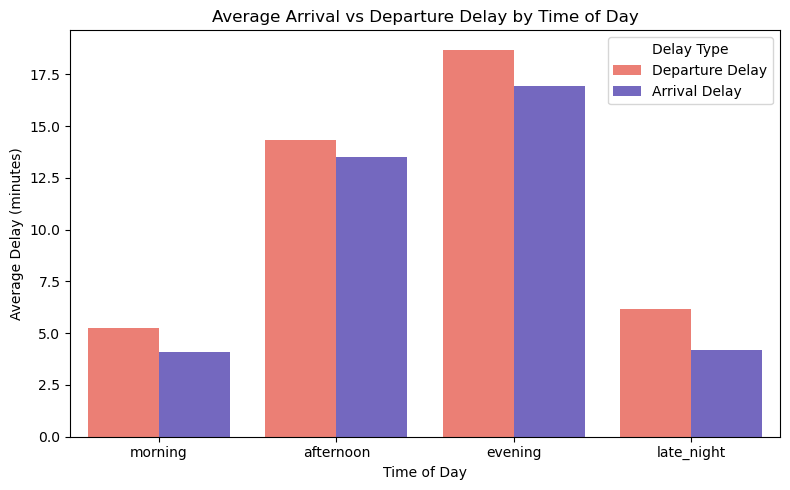

In [10]:
# Melt for combined plotting
df_melted = df_timeofday.melt(
    id_vars='time_of_day',
    value_vars=['avg_dep_delay', 'avg_arr_delay'],
    var_name='delay_type',
    value_name='avg_delay_minutes'
)

# Rename for legend clarity
df_melted['delay_type'] = df_melted['delay_type'].map({
    'avg_dep_delay': 'Departure Delay',
    'avg_arr_delay': 'Arrival Delay'
})

# Define custom colors
custom_palette = {
    'Departure Delay': '#FF6F61',  # Coral Red
    'Arrival Delay': '#6A5ACD'     # Slate Blue
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x='time_of_day', 
    y='avg_delay_minutes', 
    hue='delay_type', 
    data=df_melted,
    palette=custom_palette  # Apply custom palette here
)
plt.title("Average Arrival vs Departure Delay by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Delay (minutes)")
plt.legend(title="Delay Type")
plt.tight_layout()
save_plot("delay_by_timeofday_combined")
plt.show()

The visualized data shows a clear upward trend in both departure and arrival delays as the day progresses. **Flights scheduled in the morning experience the shortest delays** with average departure and arrival delays of approximately 5.24 and 4.10 minutes respectively. This suggests that morning operations tend to run smoothly likely due to a fresh start with fewer accumulated disruptions.

As the day advances into the afternoon and evening, **delays increase significantly** and peaking during the evening hours where departure delays reach nearly 18.7 minutes and arrival delays around 16.9 minutes. This increase can be attributed to a compounding effect like delays from earlier flights ripple forward, traffic builds up at both airports and in the air and aircraft turnaround times become tighter.

Interestingly, **late-night flights see a drop in average delays**, potentially due to reduced traffic volume and fewer operational bottlenecks. However, the delay values remain slightly higher than morning levels. This is indicating some residual effects of earlier delays may still persist.

Overall, the analysis reinforces a common recommendation in air travel where **flights departing earlier in the day tend to be more punctual**. It making morning flights a preferable option for travelers seeking timely departures and arrivals.


### **1.B Which days of the week show better on-time performance?**

This section explores how average flight delays vary by day of the week to identify which days offer more reliable scheduling. Flight delays can be influenced by passenger traffic, staffing levels, and air traffic congestion and this factors that tend to fluctuate across the weekly cycle. For instance, Mondays and Fridays often see high business travel volume, while weekends may be affected by leisure traffic. This analysis considers both departure delays and arrival delays, as each impacts passengers differently. Only non-cancelled flights are included to ensure the accuracy of delay measurements.

In [11]:
# 1B. Delay by Day of Week Hive query
query_dayofweek = """
DROP TABLE IF EXISTS delay_by_dayofweek;
CREATE TABLE delay_by_dayofweek AS
SELECT
  dayofweek,
  AVG(arrdelay) AS avg_arrival_delay,
  AVG(depdelay) AS avg_departure_delay
FROM enriched_2007
WHERE cancelled = 0
  AND dayofweek IS NOT NULL
  AND depdelay IS NOT NULL
  AND arrdelay IS NOT NULL
GROUP BY dayofweek
ORDER BY dayofweek
"""

# Run Hive query (adjust as per your cursor or connection setup)
cursor.execute("DROP TABLE IF EXISTS delay_by_dayofweek")
cursor.execute(query_dayofweek.split(";", 1)[1])

# Load to DataFrame
df_dayofweek = run_query("SELECT * FROM delay_by_dayofweek")
df_dayofweek.columns = [col.split('.')[-1] for col in df_dayofweek.columns]

# Map numbers to day names
df_dayofweek['day'] = df_dayofweek['dayofweek'].map({
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'
})

# Save as CSV (optional)
save_csv(df_dayofweek, "delay_by_dayofweek")

df_dayofweek

,dayofweek,avg_arrival_delay,avg_departure_delay,day
0,1,10.615777,11.957750,Monday
1,2,8.407018,9.475962,Tuesday
2,3,10.132260,10.768795,Wednesday
3,4,12.911143,13.034167,Thursday
4,5,13.301048,13.737475,Friday
5,6,5.928993,9.059743,Saturday
6,7,10.412182,12.045889,Sunday


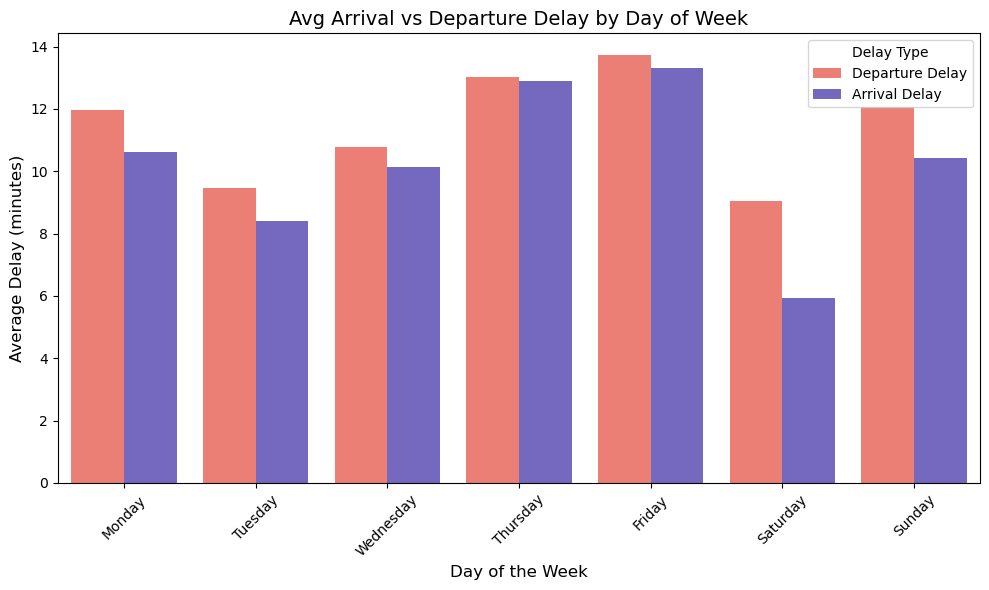

In [12]:
# Reshape for combined plot
df_melted = df_dayofweek.melt(
    id_vars='day',
    value_vars=['avg_arrival_delay', 'avg_departure_delay'],
    var_name='delay_type',
    value_name='avg_delay_minutes'
)

# Rename delay_type values for a cleaner legend
df_melted['delay_type'] = df_melted['delay_type'].map({
    'avg_departure_delay': 'Departure Delay',
    'avg_arrival_delay': 'Arrival Delay'
})

# Define custom colors
custom_palette = {
    'Departure Delay': '#FF6F61',  # Coral Red
    'Arrival Delay': '#6A5ACD'     # Slate Blue
}

# Plot with custom palette and hue order (Departure first, then Arrival)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='day',
    y='avg_delay_minutes',
    hue='delay_type',
    data=df_melted,
    palette=custom_palette,
    hue_order=['Departure Delay', 'Arrival Delay']  # Departure first, then arrival
)

plt.title("Avg Arrival vs Departure Delay by Day of Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Delay (minutes)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Delay Type')
plt.tight_layout()

save_plot("delay_by_dayofweek_combined")
plt.show()

The delay analysis by day of the week highlights several important trends in airline punctuality. **Friday** emerges as the day with the **highest average delays**, with **arrival delays at 13.30 minutes** and **departure delays peaking at 13.74 minutes**. This aligns with expectations, as the end of the workweek often sees a surge in both business and leisure travel, contributing to heightened airport congestion and air traffic volume that can disrupt schedules.

**Thursday** closely follows, showing an average delay of **over 13 minutes** for both arrivals and departures. These elevated delays suggest that the pressure builds up toward the latter part of the week, compounding disruptions from earlier flights and limiting recovery time between schedules.

**Saturday**, in contrast, shows the **lowest average arrival delay** at **just under 6 minutes**, implying smoother inbound flight operations. However, **departure delays remain higher at around 9 minutes**, possibly due to operational limitations, such as fewer crews or aircraft rotations on weekends.

Interestingly, **Tuesday** presents the **most balanced and efficient performance**, with **arrival delays averaging 8.41 minutes** and **departure delays at 9.48 minutes**. This midweek stability likely reflects lighter travel demand, allowing for more efficient airport throughput and fewer cascading delays.

Overall, the data suggests that **late-week travel is more susceptible to delays**, especially on **Thursdays and Fridays**, while **midweek days like Tuesday** offer a more reliable window for on-time performance. For travelers looking to reduce disruption, planning flights around these patterns could be advantageous.

### **1.C During which months or seasons are flights most likely to be on time?**
Flight delays often fluctuate across months and seasons due to weather, passenger volume, and holiday travel surges. This section evaluates both arrival and departure delays for each month to identify when flights are typically most punctual. The analysis includes seasonal classification (Winter, Spring, Summer, Autumn) and is visualized with color-coded seasonal blocks for better interpretability.

In [20]:
# 1C. Delay by Month and Season Hive Query
query_month_season = """
DROP TABLE IF EXISTS delay_by_month;
CREATE TABLE delay_by_month AS
SELECT
  month,
  CASE
    WHEN month IN (12, 1, 2) THEN 'Winter'
    WHEN month IN (3, 4, 5) THEN 'Spring'
    WHEN month IN (6, 7, 8) THEN 'Summer'
    ELSE 'Autumn'
  END AS season,
  AVG(arrdelay) AS avg_arrival_delay,
  AVG(depdelay) AS avg_departure_delay
FROM enriched_2007
WHERE cancelled = 0
  AND month IS NOT NULL
  AND arrdelay IS NOT NULL
  AND depdelay IS NOT NULL
GROUP BY month
ORDER BY month
"""

# Drop table safely
cursor.execute("DROP TABLE IF EXISTS delay_by_month")

# Then execute the query
cursor.execute(query_month_season.split(";", 1)[1])


# Load data from Hive
df_month = run_query("SELECT * FROM delay_by_month")

# Fix column names: take last part after dot and lowercase
df_month.columns = [col.split('.')[-1].lower() for col in df_month.columns]

# Optional: print columns to verify
print("Columns loaded:", df_month.columns)

# Save dataframe as CSV
save_csv(df_month, "delay_by_month")

df_month

Columns loaded: Index(['month', 'season', 'avg_arrival_delay', 'avg_departure_delay'], dtype='object')


,month,season,avg_arrival_delay,avg_departure_delay
0,1,Winter,10.323543,10.841507
1,2,Winter,13.525509,13.978051
2,3,Spring,10.228444,11.942989
3,4,Spring,8.765983,10.326403
4,5,Spring,7.134528,8.444261
5,6,Summer,16.378392,16.382116
6,7,Summer,14.352536,15.064445
7,8,Summer,12.569015,13.548817
8,9,Autumn,3.764160,6.145453
9,10,Autumn,6.609741,8.023176


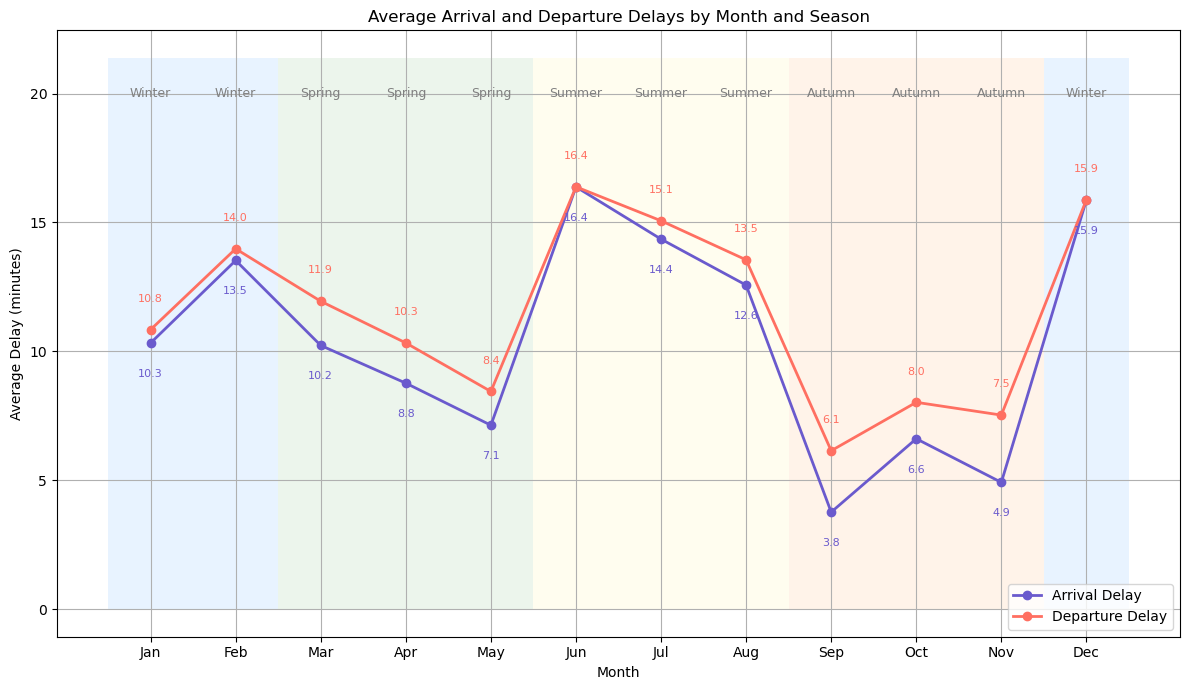

In [21]:
# Define custom seasonal colors
season_colors = {
    'Winter': '#B3D9FF',
    'Spring': '#C1E1C1',
    'Summer': '#FFFACD',
    'Autumn': '#FFDAB9'
}

# Plot average arrival and departure delays by month with seasonal shading
plt.figure(figsize=(12, 7))

# Plot delays
plt.plot(df_month['month'], df_month['avg_arrival_delay'], marker='o', label='Arrival Delay', color='#6A5ACD', linewidth=2)
plt.plot(df_month['month'], df_month['avg_departure_delay'], marker='o', label='Departure Delay', color='#FF6F61', linewidth=2)

# Annotate values on the plot
for i, row in df_month.iterrows():
    x = row['month']
    plt.text(x, row['avg_departure_delay'] + 1.0, f"{row['avg_departure_delay']:.1f}", color='#FF6F61',
             ha='center', va='bottom', fontsize=8)
    plt.text(x, row['avg_arrival_delay'] - 1.0, f"{row['avg_arrival_delay']:.1f}", color='#6A5ACD',
             ha='center', va='top', fontsize=8)

# Get max y value for shading and labels
max_y = max(df_month['avg_arrival_delay'].max(), df_month['avg_departure_delay'].max()) + 5

# Add background color by season for each month
for season in df_month['season'].unique():
    months_in_season = df_month[df_month['season'] == season]['month']
    for m in months_in_season:
        plt.fill_between([m - 0.5, m + 0.5], 0, max_y, color=season_colors[season], alpha=0.3, edgecolor=None)

# Add season labels at the top
for m, s in df_month[['month', 'season']].drop_duplicates().values:
    plt.text(m, max_y - 1.5, s, ha='center', fontsize=9, color='gray')

# X-axis labels as months
plt.xticks(df_month['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.title("Average Arrival and Departure Delays by Month and Season")
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()

# Save the plot
save_plot("delay_by_month_seasonal")

# Show plot
plt.show()


An examination of monthly delay patterns shows that **June and December** experience the **highest average arrival and departure delays** with exceeding 15 minutes. These months align with major travel peaks which are**summer vacations and winter holidays** where often lead to higher passenger volumes, congested air traffic, and increased delays.

In contrast, **spring months (March to May)** consistently record **lower delay averages**, with **May showing the lowest delay** across all months just around 7–8 minutes. This improvement is likely due to milder weather conditions and lower demand, enabling airlines and airports to maintain smoother operations.

Interestingly, **autumn especially September and November** demonstrates the **most punctual performance**, with arrival delays dropping as low as **3.8 minutes** in September. This period benefits from a post-summer travel lull and fewer weather disruptions.

When interpreting this data:

* **Best months to fly:** **May and September**, which offer the **shortest delays** and more reliable on-time performance.
* **Worst months to fly:** **June and December**, where operational stress peaks due to holidays, resulting in **significant delays**.

Understanding these trends allows both airlines and passengers to make better scheduling decisions, especially when flexibility is available.

### **1.D By season**

This section presents an overview of average flight delays categorized by season. By grouping months into broader seasonal categories which are Winter, Spring, Summer and Autumn. 

In [22]:
# 1D. Delay by Season
query_delay_by_season = """
DROP TABLE IF EXISTS delay_by_season;
CREATE TABLE delay_by_season AS
SELECT
  season,
  AVG(avg_arrival_delay) AS avg_arrival_delay,
  AVG(avg_departure_delay) AS avg_departure_delay
FROM delay_by_month
GROUP BY season
"""
cursor.execute("DROP TABLE IF EXISTS delay_by_season")
cursor.execute(query_delay_by_season.split(";", 1)[1])

# Load to DataFrame
df_season = run_query("SELECT * FROM delay_by_season")
df_season.columns = [col.split('.')[-1] for col in df_season.columns]

# Sort season order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
df_season['season'] = pd.Categorical(df_season['season'].str.capitalize(), categories=season_order, ordered=True)
df_season = df_season.sort_values('season')

save_csv(df_season, "delay_by_season")

df_season

,season,avg_arrival_delay,avg_departure_delay
3,Winter,13.241786,13.567106
1,Spring,8.709652,10.237884
2,Summer,14.433314,14.998459
0,Autumn,5.097281,7.232003


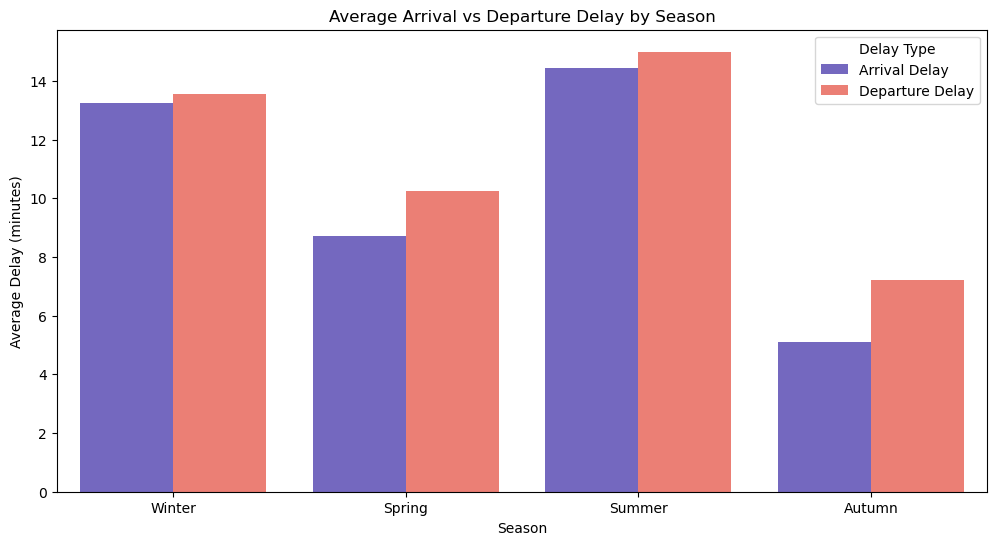

In [23]:
# Melt for grouped bar plot
df_season_melted = df_season.melt(
    id_vars='season',
    value_vars=['avg_arrival_delay', 'avg_departure_delay'],
    var_name='delay_type',
    value_name='avg_delay_minutes'
)

# Map delay_type values to nice labels for legend
df_season_melted['delay_type'] = df_season_melted['delay_type'].map({
    'avg_arrival_delay': 'Arrival Delay',
    'avg_departure_delay': 'Departure Delay'
})

# Correct color palette with mapped keys
color_palette = {
    'Arrival Delay': '#6A5ACD',   # Slate Blue for Arrival Delay
    'Departure Delay': '#FF6F61'  # Coral Red for Departure Delay
}

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='season',
    y='avg_delay_minutes',
    hue='delay_type',
    data=df_season_melted,
    palette=color_palette
)

plt.title("Average Arrival vs Departure Delay by Season")
plt.xlabel("Season")
plt.ylabel("Average Delay (minutes)")
plt.legend(title="Delay Type", loc='best')  # Legend labels from mapped column
save_plot("delay_by_season_combined")
plt.show()


The analysis reveals clear seasonal variations in flight delays. **Summer** emerges as the season with the **highest average delays**, with arrival delays averaging approximately **14.43 minutes** and departure delays peaking at **nearly 15.00 minutes**. This is likely due to heightened travel demand during summer holidays, increased air traffic and potential weather disruptions such as thunderstorms and all contributing to operational congestion.

**Winter** follows closely with elevated delay figures with **13.24 minutes** for arrivals and **13.57 minutes** for departures. These delays may be associated with weather related issues such as snowstorms, de-icing procedures and reduced visibility which commonly impact both departure and arrival schedules.

In contrast, **Spring** shows a **noticeable reduction in delays**. Particularly for arrivals (**8.71 minutes**) and slightly higher for departures (**10.24 minutes**). This season generally experiences more favorable weather and moderate travel activity, which can contribute to smoother airport operations and fewer delays.

**Autumn** records the **lowest delay averages** with just **5.10 minutes** for arrivals and **7.23 minutes** for departures. This may be attributed to relatively calm weather conditions and a dip in travel volume after the summer peak and before the winter holidays.

Overall, the seasonal delay trends emphasize how external factors such as weather patterns and travel demand strongly influence flight punctuality, with Spring and Autumn offering the most reliable performance in terms of reduced delays.


## 2. Delay Factors

### **2.A Identify and rank the top 3-5 factors contributing to flight delays, based on the delay categories provided in the dataset.**
### **2.B Quantify the impact of each factor (in minutes of delay and percentage of total delays).**

Avoiding flight delays entirely would be ideal but real-world limitations such as job obligations, peak travel seasons or limited airline options often restrict travel flexibility. As a result, it becomes valuable to understand the **primary causes of flight delays**, which are outlined in the dataset. These causes include:

1. Delays due to late-arriving aircraft
2. Weather-related disruptions
3. Airline or carrier-specific delays
4. Delays from the National Airspace System (NAS)
5. Security-related issues

By examining the contribution of each factor to the total delay time, more strategic decisions can be made. For instance, understanding that certain delay types are more common during specific periods or with particular carriers allows passengers to plan with greater awareness—whether by choosing more punctual airlines, traveling at less congested times, or simply building in extra time to accommodate likely disruptions.



In [18]:
# 2A. DELAY FACTORS — Total Minutes by Cause (Hive)
query_delay_factors = """
DROP TABLE IF EXISTS delay_factors_summary;

CREATE TABLE delay_factors_summary AS
SELECT
  SUM(carrierdelay) AS carrier,           -- Delay caused by airline
  SUM(weatherdelay) AS weather,           -- Delay due to weather
  SUM(nasdelay) AS nas,                   -- Delay due to NAS (traffic control, airspace)
  SUM(securitydelay) AS security,         -- Delay due to security checks
  SUM(lateaircraftdelay) AS late_aircraft -- Delay caused by previous aircraft arriving late
FROM enriched_2007
WHERE cancelled = 0
  AND carrierdelay IS NOT NULL
  AND weatherdelay IS NOT NULL
  AND nasdelay IS NOT NULL
  AND securitydelay IS NOT NULL
  AND lateaircraftdelay IS NOT NULL
"""

# Execute DROP and CREATE queries in Hive
cursor.execute("DROP TABLE IF EXISTS delay_factors_summary")
cursor.execute(query_delay_factors.split(";", 1)[1])

# Load data from Hive
df_factors = run_query("SELECT * FROM delay_factors_summary")
df_factors.columns = [col.split('.')[-1] for col in df_factors.columns]  # Clean column names

# Melt into long format for plotting and comparison
df_factors_melted = df_factors.melt(var_name='reason', value_name='total_minutes')

# Calculate percentage of total delay
total_delay = df_factors_melted['total_minutes'].sum()
df_factors_melted['percentage'] = (df_factors_melted['total_minutes'] / total_delay) * 100

# Sort by total delay
df_factors_melted = df_factors_melted.sort_values(by='total_minutes', ascending=False)

# Export to CSV
save_csv(df_factors_melted, "delay_factors_summary")

df_factors_melted

,reason,total_minutes,percentage
4,late_aircraft,35999804,37.759280
0,carrier,26930044,28.246239
2,nas,26843375,28.155334
1,weather,5397016,5.660793
3,security,170043,0.178354


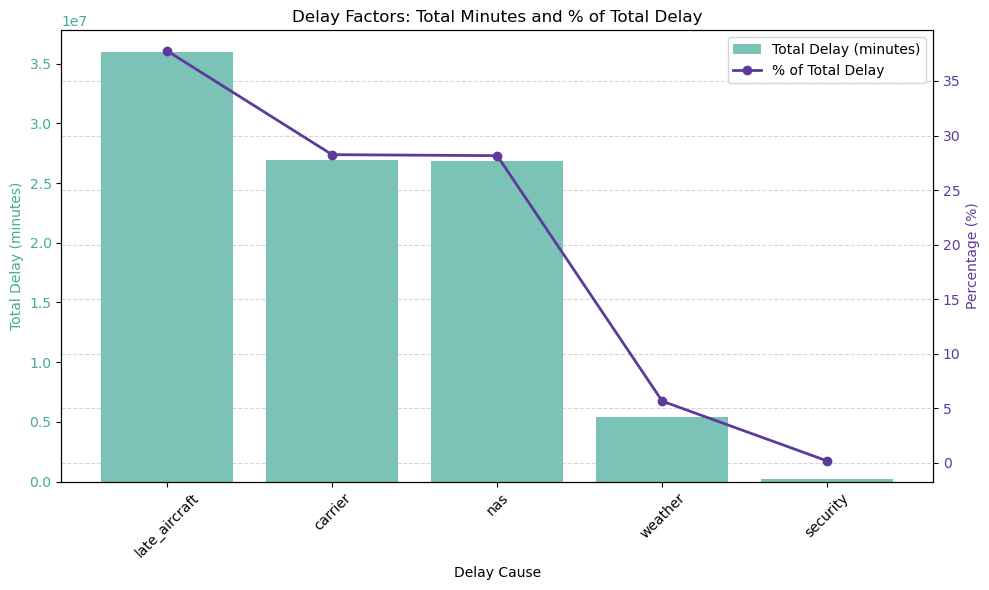

In [19]:
# Sort by total delay for consistency
df_factors_melted = df_factors_melted.sort_values('total_minutes', ascending=False)

# Setup plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total delay minutes (left y-axis)
bar = ax1.bar(
    df_factors_melted['reason'],
    df_factors_melted['total_minutes'],
    color='#44AA99',
    alpha=0.7,
    label='Total Delay (minutes)'
)
ax1.set_xlabel("Delay Cause")
ax1.set_ylabel("Total Delay (minutes)", color='#44AA99')
ax1.tick_params(axis='y', labelcolor='#44AA99')
ax1.set_title("Delay Factors: Total Minutes and % of Total Delay")
ax1.set_xticklabels(df_factors_melted['reason'], rotation=45)

# Line plot for percentage (right y-axis)
ax2 = ax1.twinx()
line = ax2.plot(
    df_factors_melted['reason'],
    df_factors_melted['percentage'],
    color='#5D3A9B',
    marker='o',
    linewidth=2,
    label='Percentage of Total Delay'
)
ax2.set_ylabel("Percentage (%)", color='#5D3A9B')
ax2.tick_params(axis='y', labelcolor='#5D3A9B')

# Custom legend
legend_elements = [
    Patch(facecolor='#44AA99', alpha=0.7, label='Total Delay (minutes)'),
    plt.Line2D([0], [0], color='#5D3A9B', lw=2, marker='o', label='% of Total Delay')
]
plt.legend(handles=legend_elements, loc='upper right')

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save and show
save_plot("delay_factors_combined")
plt.show()


Analyzing the total delay minutes by cause reveals that **late aircraft delays** are the most significant contributor which accounting for approximately **38% of total delay time**. This category represents delays caused by a previous flight arriving late which creates a cascading effect on subsequent departures. The high contribution highlights how tightly airline schedules are interlinked where a single disruption can ripple through the system.

**Carrier-related delays**, such as issues with crew scheduling, aircraft maintenance or operations make up about **28%** of the total delay minutes. This shows that operational efficiency within airlines is a critical factor influencing on-time performance.

Closely following are **NAS (National Airspace System) delays** also at around **28%** which include delays caused by traffic volume, air traffic control and routing. While these delays are frequent, their cumulative impact is roughly on par with carrier delays which indicating widespread but generally manageable disruptions.

In contrast, **weather-related delays** contribute only **5.7%** of the total delay time. Although weather can cause significant disruptions, especially in severe conditions. These events are relatively infrequent across the full year. Lastly, **security delays** are minimal, contributing less than **0.2%** to total delay minutes.

Overall, the findings highlight that **delays caused by late aircraft and carriers are the most impactful**, both in frequency and total time lost. Addressing these areas through better scheduling, resource allocation, and operational readiness could lead to substantial improvements in on-time performance.


## 3. Cancellation Analysis

### **3.A Identify the primary reasons for flight cancellations as categorized in the dataset.**
Flight cancellations are a significant disruption in the airline industry, affecting not only operational efficiency but also customer satisfaction. Understanding the reasons behind these cancellations helps airlines and stakeholders address the root causes and improve service reliability. The U.S. Department of Transportation categorizes flight cancellation reasons into four major codes:

1. A for Carrier-related issues (e.g., mechanical problems, staffing)

2. B for Weather disruptions

3. C for National Aviation System (NAS) delays (e.g., air traffic control)

4. D for Security-related concerns

This section analyzes all cancelled flights in the 2007 dataset and quantifies how frequently each of these cancellation reasons occurred. The findings are visualized using a bar chart to clearly highlight which causes were most prevalent.

In [24]:
# 3A. Cancellation by Reasons

query_cancel_reasons = """
DROP TABLE IF EXISTS cancel_by_reason;
CREATE TABLE cancel_by_reason AS
SELECT cancellationcode, COUNT(*) AS cancel_count
FROM enriched_2007
WHERE cancelled = 1 AND cancellationcode IS NOT NULL
GROUP BY cancellationcode
"""

# Run DROP and CREATE separately
cursor.execute("DROP TABLE IF EXISTS cancel_by_reason")
cursor.execute(query_cancel_reasons.split(";", 1)[1])

# Load into DataFrame
df_cancel_reason = run_query("SELECT * FROM cancel_by_reason")
df_cancel_reason.columns = [col.split('.')[-1] for col in df_cancel_reason.columns]

# Optional: Map codes to full reason labels (A, B, C, D → descriptive)
cancel_reason_labels = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'NAS',
    'D': 'Security'
}
df_cancel_reason['reason'] = df_cancel_reason['cancellationcode'].map(cancel_reason_labels)

# Export to CSV
save_csv(df_cancel_reason, "cancel_by_reason")

df_cancel_reason

,cancellationcode,cancel_count,reason
0,A,22606,Carrier
1,B,11863,Weather
2,C,7368,NAS
3,D,1,Security


In [25]:
# 3B. Cancellation by Season and Reason
query_cancel_by_season_reason = """
DROP TABLE IF EXISTS cancel_by_season_reason;
CREATE TABLE cancel_by_season_reason AS
SELECT
  CASE
    WHEN month IN (12, 1, 2) THEN 'winter'
    WHEN month IN (3, 4, 5) THEN 'spring'
    WHEN month IN (6, 7, 8) THEN 'summer'
    ELSE 'fall'
  END AS season,
  cancellationcode,
  COUNT(*) AS cancel_count
FROM enriched_2007
WHERE cancelled = 1 AND cancellationcode IS NOT NULL AND month IS NOT NULL
GROUP BY
  CASE
    WHEN month IN (12, 1, 2) THEN 'winter'
    WHEN month IN (3, 4, 5) THEN 'spring'
    WHEN month IN (6, 7, 8) THEN 'summer'
    ELSE 'fall'
  END,
  cancellationcode
"""

# Execute Hive Query
cursor.execute("DROP TABLE IF EXISTS cancel_by_season_reason")
cursor.execute(query_cancel_by_season_reason.split(";", 1)[1])

# Load DataFrame
df_cancel_season_reason = run_query("SELECT * FROM cancel_by_season_reason")
df_cancel_season_reason.columns = [col.split('.')[-1] for col in df_cancel_season_reason.columns]

# Map reason codes
df_cancel_season_reason['reason'] = df_cancel_season_reason['cancellationcode'].map(cancel_reason_labels)

# Season order
season_order = ['winter', 'spring', 'summer', 'fall']
df_cancel_season_reason['season'] = pd.Categorical(df_cancel_season_reason['season'], categories=season_order, ordered=True)
df_cancel_season_reason = df_cancel_season_reason.sort_values(['season', 'reason'])

# Export
save_csv(df_cancel_season_reason, "cancel_by_season_reason")

# Pivot for plot
pivot_df = df_cancel_season_reason.pivot(index='season', columns='reason', values='cancel_count').fillna(0).astype(int)
pivot_df = pivot_df.reset_index()

df_cancel_season_reason

,season,cancellationcode,cancel_count,reason
10,winter,A,6075,Carrier
12,winter,C,1553,NAS
11,winter,B,7190,Weather
3,spring,A,4813,Carrier
5,spring,C,1460,NAS
4,spring,B,2318,Weather
6,summer,A,8302,Carrier
8,summer,C,3472,NAS
9,summer,D,1,Security
7,summer,B,1413,Weather


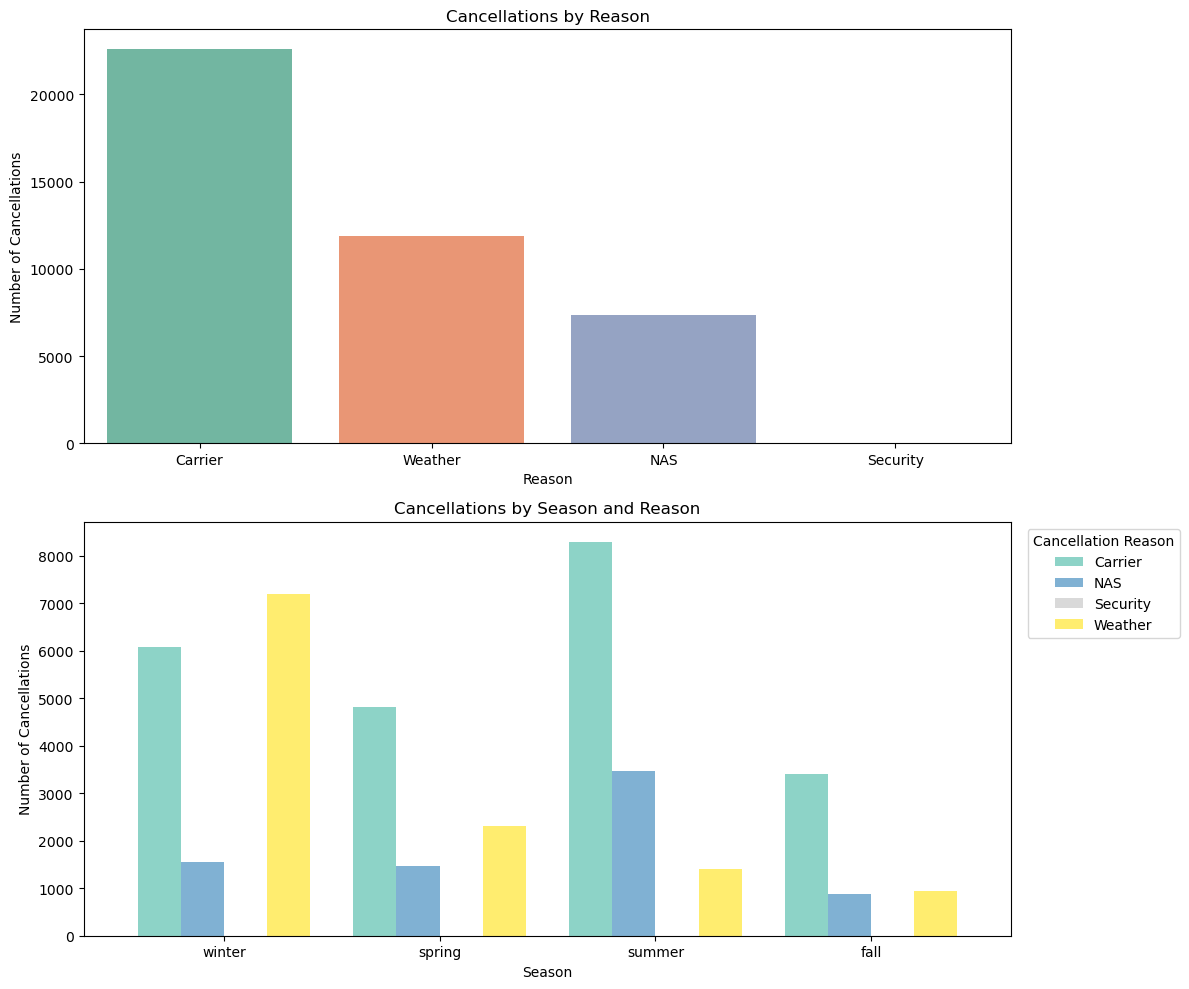

In [26]:
# Final Combined Plot (Vertically stacked)
fig, axs = plt.subplots(2, 1, figsize=(12, 10))  # 2 rows, 1 column layout

# Top: Barplot for overall cancellation reasons
sns.barplot(x='reason', y='cancel_count', data=df_cancel_reason, ax=axs[0], palette='Set2')
axs[0].set_title("Cancellations by Reason")
axs[0].set_xlabel("Reason")
axs[0].set_ylabel("Number of Cancellations")

# Bottom: Grouped bar for seasonal cancellation reasons
pivot_df.set_index('season').plot(kind='bar', ax=axs[1], colormap='Set3', width=0.8)
axs[1].set_title("Cancellations by Season and Reason")
axs[1].set_xlabel("Season")
axs[1].set_ylabel("Number of Cancellations")
axs[1].legend(title="Cancellation Reason", bbox_to_anchor=(1.01, 1), loc='upper left')
axs[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
save_plot("cancel_reason_vs_season_stacked")
plt.show()

The analysis of flight cancellations by reason reveals that **carrier-related issues are the most dominant cause**, accounting for **22,606 cancellations**. This is followed by **weather-related cancellations** (11,863), **NAS (National Airspace System) delays** (7,368), and a negligible number due to **security reasons** (only 1 case reported).

This distribution is further supported when broken down by **season** which highlights **consistent seasonal variation** across all major reasons:

#### A. **Carrier-Related Cancellations:**

Carrier issues (such as operational decisions or maintenance problems) dominate all seasons:

* **Summer** records the **highest** with 8,302 cancellations, likely due to peak travel season causing strain on airline operations.
* **Winter** and **Spring** follow with 6,075 and 4,813 cases respectively.
* **Fall** sees the lowest at 3,416, indicating more stable operations during this season.

#### B. **Weather-Related Cancellations:**

As expected, weather-related issues peak during **Winter (7,190 cancellations)** where attributed to snowstorms, fog and other severe winter weather conditions. Spring (2,318) and Summer (1,413) show significantly fewer weather-related disruptions, while **Fall (942)** sees the lowest likely due to generally mild weather.

#### C. **NAS (Airspace/Traffic Control) Cancellations:**

NAS-related cancellations, which include air traffic congestion and routing delays, are relatively stable but show a peak in **Summer (3,472)** and **Winter (1,553)**. This indicates that both **high travel volumes** during Summer which is around 1.8 mil and **weather-constrained airspace** for Winter can lead to increased NAS disruptions.

#### D. **Security-Related Cancellations:**

Security issues are **extremely rare**, with **only one reported case** in the entire dataset, occurring in **Summer**. This suggests that while security is a critical concern, it is **not a significant source of cancellations** operationally.

In conclusion **Carrier issues** are the leading cause of cancellations year-round, especially in Summer Then, **Weather-related disruptions** are highly **seasonal**, peaking in Winter. In addition, **NAS delays** reflect both **volume-related and weather-related stress** on airspace. Lastly, **Fall shows the lowest cancellation counts across most reasons**, suggesting it is generally a **more reliable season for air travel**.



### **3.B Determine if cancellations correlate with specific airlines, airports, or time periods.**

To evaluate whether cancellations are concentrated among certain airlines, airports, or time periods, the dataset is analyzed by segmenting flight records based on carrier, airport of origin/destination and time periods attributes. By comparing cancellation rates across these categories, underlying patterns can be identified that may point to operational inefficiencies, environmental constraints, or demand-driven factors. This helps determine whether cancellations are random or systematically associated with specific entities or timeframes.

### 3.b Airline/Carrier

In [ ]:
# 3B. Cancellations by Airline

query_cancel_airline = """
DROP TABLE IF EXISTS cancel_by_airline;

CREATE TABLE cancel_by_airline AS
SELECT
  uniquecarrier,
  carrierdescription,
  COUNT(*) AS total_flights,
  SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) AS cancellation_count,
  ROUND(100.0 * SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancellation_rate_pct
FROM enriched_2007
WHERE uniquecarrier IS NOT NULL AND carrierdescription IS NOT NULL
GROUP BY uniquecarrier, carrierdescription
"""

# Execute in Hive
cursor.execute("DROP TABLE IF EXISTS cancel_by_airline")
cursor.execute(query_cancel_airline.split(";", 1)[1])


# Load to DataFrame
df_cancel_airline = run_query("SELECT * FROM cancel_by_airline")
df_cancel_airline.columns = [col.split('.')[-1] for col in df_cancel_airline.columns]

# Sort by cancellation rate
df_cancel_airline = df_cancel_airline.sort_values(by='cancellation_rate_pct', ascending=False)

# Save CSV
save_csv(df_cancel_airline, "cancel_by_airline")

df_cancel_airline.head(10)

,uniquecarrier,carrierdescription,total_flights,cancellation_count,cancellation_rate_pct
18,YV,Mesa Airlines Inc.,277876,10340,3.72
6,EV,Atlantic Southeast Airlines,286234,8920,3.12
11,NW,Northwest Airlines Inc.,388156,7025,1.81
2,AS,Alaska Airlines Inc.,150984,2360,1.56
5,DL,Delta Air Lines Inc.,468645,6459,1.38
8,FL,AirTran Airways Corporation,263159,2602,0.99
12,OH,Comair Inc.,217698,2058,0.95
7,F9,Frontier Airlines Inc.,97756,398,0.41
3,B6,JetBlue Airways,184069,425,0.23
1,AQ,Aloha Airlines Inc.,41489,89,0.21


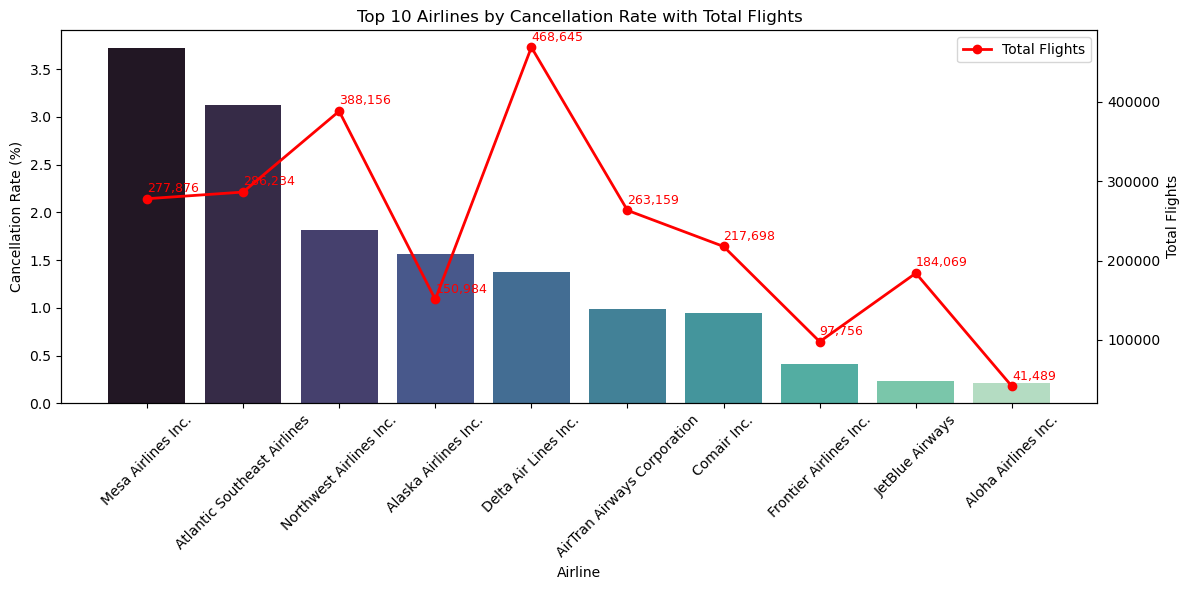

In [ ]:
# Top 10 airlines by cancellation rate
top10_airlines = df_cancel_airline.head(10)

# Bar plot for cancellation rate
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='carrierdescription', y='cancellation_rate_pct', data=top10_airlines, palette='mako', ax=ax1)

ax1.set_title("Top 10 Airlines by Cancellation Rate with Total Flights")
ax1.set_xlabel("Airline")
ax1.set_ylabel("Cancellation Rate (%)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Line plot for total flights on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(top10_airlines['carrierdescription'], top10_airlines['total_flights'], color='red', marker='o', linewidth=2, label='Total Flights')
ax2.set_ylabel("Total Flights", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add value labels above red dots
for i, val in enumerate(top10_airlines['total_flights']):
    ax2.text(i, val + max(top10_airlines['total_flights']) * 0.01, f"{val:,}", ha='left', va='bottom', fontsize=9, color='red')

# Legend for total flights
ax2.legend(loc='upper right')

plt.tight_layout()
save_plot("cancel_by_airline_top10_with_total_flights")
plt.show()


The visualization ranks the **top 10 airlines by cancellation rate** for the year 2007. This metric calculated as the percentage of canceled flights out of total scheduled flights—offers insight into operational reliability across different carriers.

The highest cancellation rate goes to **Mesa Airlines Inc. (YV)** leads with the **3.72%** followed by **Atlantic Southeast Airlines (EV)** at **3.12%**. Both are **regional carriers**, which tend to experience more cancellations due to tight schedules, limited fleet flexibility and frequent short-haul operations that are more vulnerable to cascading delays.

Then, **Northwest (NW)** and **Delta (DL)** are legacy carriers with high flight volumes. Although their cancellation rates are lower than the regionals which are at 1.81% and 1.38%, respectively. They still appear in the top 10 due to the large number of scheduled flights. Operational complexity and maintenance factors may contribute to their inclusion.

Next, **AirTran Airways (FL)**, **Comair (OH)**, and **Frontier (F9)** maintain cancellation rates below 1%. This indicates relatively strong reliability, potentially due to focused route networks or efficient fleet management. **JetBlue (B6)** and **Aloha Airlines (AQ)** stand out with some of the **lowest cancellation rates**, at just **0.23%** and **0.21%** respectively. These airlines may benefit from stable weather routes or newer operational models that minimize disruption.

In conclsuion, **regional airlines are more prone to cancellations** likely due to tighter rotations, fewer backup aircraft, and higher exposure to weather-related impacts. Then, **legacy carriers**, although more reliable in percentage terms, still experience a high absolute number of cancellations due to volume. Next, **passengers seeking lower cancellation risks** may prefer larger national airlines with robust infrastructure or smaller airlines with focused, well-managed routes. Lastly, this analysis helps identify not just which airlines cancel most frequently, but also which are relatively dependable valuable information for both passengers and planners.


In [32]:
df_cancel_airline = pd.read_csv("data/cancel_by_airline.csv")

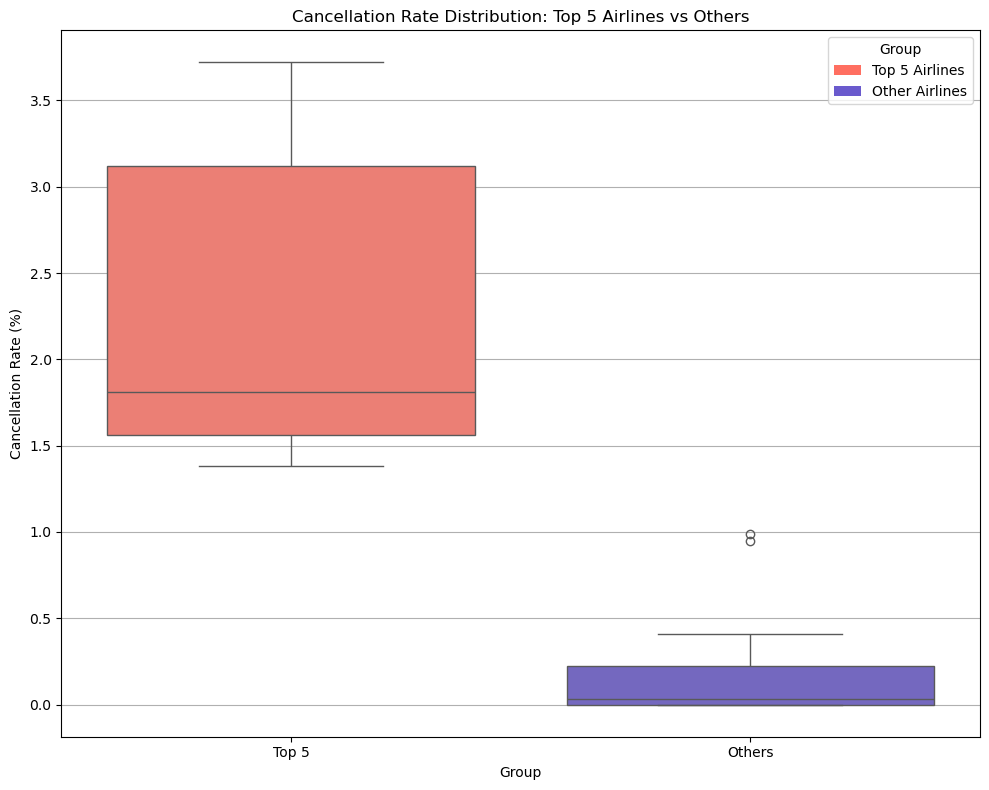

In [ ]:
# Top 5 airlines by cancellation rate
top5_airlines = df_cancel_airline.head(5)

# Define the list of top 5 airlines by 'uniquecarrier'
top5_list = top5_airlines['uniquecarrier'].tolist()

# Create the group column
df_cancel_airline['group'] = df_cancel_airline['uniquecarrier'].apply(
    lambda x: 'Top 5' if x in top5_list else 'Others'
)

# Plot boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(
    x='group',
    y='cancellation_rate_pct',
    data=df_cancel_airline,
    palette={'Top 5': '#FF6F61', 'Others': '#6A5ACD'}
)

# Add title and labels
plt.title("Cancellation Rate Distribution: Top 5 Airlines vs Others")
plt.xlabel("Group")
plt.ylabel("Cancellation Rate (%)")
plt.grid(axis='y')

# Create custom legend
legend_elements = [
    Patch(facecolor='#FF6F61', label='Top 5 Airlines'),
    Patch(facecolor='#6A5ACD', label='Other Airlines')
]
plt.legend(handles=legend_elements, title='Group', loc='upper right')

plt.tight_layout()
save_plot("cancel_by_airline_distribution")
plt.show()


The boxplot displays the distribution of origin flight cancellation rates between the Top 5 airlines with the highest cancellation rates and all other carriers. By segmenting the data into these two groups, the visualization facilitates a clear comparison of both the variability and central tendency in cancellation performance. This approach helps determine whether high cancellation behavior is concentrated among a few specific airlines or more broadly distributed across the industry. To support the visual insights with statistical evidence, a two-sample t-test is conducted.

Hypotheses: Given a $\alpha$ of 0.05, and hypothesis of,
$$
H_0 \text{: There is no significant difference in the mean cancellation rate between Top 5 airlines and others.}
\newline
H_1 \text{: There is a significant difference in the mean cancellation rate between Top 5 airlines and others.}
$$




Levene’s test is used to assess whether the variances of two groups are statistically equal. This step is important because many statistical tests, such as the standard two-sample t-test, assume equal variances across groups. By applying Levene’s test, it becomes possible to determine whether this assumption holds, and if not, to select a more appropriate test like Welch’s t-test that does not require equal variances.

In [113]:
# Levene's Test for Equal Variances

from scipy.stats import levene

# Split data into two groups
top5_data = df_cancel_airline[df_cancel_airline['group'] == 'Top 5']['cancellation_rate_pct']
others_data = df_cancel_airline[df_cancel_airline['group'] == 'Others']['cancellation_rate_pct']

# Perform Levene's test
stat, p = levene(top5_data, others_data)

# Print results
print("Levene’s Test for Equal Variances (Airlines Cancellation Rates)")
print(f"Test Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Interpret
if p < 0.05:
    print("Result: P-value < Hnull is rejected so there are variances are significantly different so do not assume equal variance.")
else:
    print("Result: P-value > Hnull is accepted so no significant difference so equal variance assumption is reasonable.")


Levene’s Test for Equal Variances (Airlines Cancellation Rates)
Test Statistic: 5.0527
P-value: 0.0381
Result: P-value < Hnull is rejected so there are variances are significantly different so do not assume equal variance.


Welch’s t-test is a variation of the independent two-sample t-test that does not assume equal variances between groups. It is particularly suitable when the two groups being compared have unequal sample sizes or show evidence of unequal variances. Since airline cancellation data often varies in size and spread across carriers, and Levene’s test indicated unequal variances, Welch’s t-test provides a more robust and reliable comparison of mean cancellation rates between the top 5 airlines and the rest.

In [112]:
# Wechl's t-test for unequal variances
from scipy.stats import ttest_ind

# Split data for Top 5 and Others
top5_data = df_cancel_airline[df_cancel_airline['group'] == 'Top 5']['cancellation_rate_pct']
others_data = df_cancel_airline[df_cancel_airline['group'] == 'Others']['cancellation_rate_pct']

# Perform Welch's t-test
t_stat, p_value = ttest_ind(top5_data, others_data, equal_var=False)

# Print results
print("Welch's t-test: Airlines Cancellation - Top 5 Airlines vs Others")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Result: P-value < Hnull is rejected so there are significant difference in cancellation rates between Top 5 airlines and Others.")
else:
    print("Result: P-value > Hnull is accepted so no significant difference in cancellation rates between Top 5 airlines and Others.")


Welch's t-test: Airlines Cancellation - Top 5 Airlines vs Others
T-statistic: 4.4344
P-value: 0.0096
Result: P-value < Hnull is rejected so there are significant difference in cancellation rates between Top 5 airlines and Others.


### 3.b Airport of Origin

In [ ]:
# Then create the cancel_by_airport_summary table
query_cancel_by_airport = """
CREATE TABLE cancel_by_airport_summary AS
SELECT
  airportname,
  city,
  state,
  country,
  latitude,
  longitude,
  flight_type,
  SUM(cancellations) AS cancellations,
  SUM(flights) AS total_flights,
  ROUND(100.0 * SUM(cancellations) / SUM(flights), 2) AS cancel_rate
FROM (
  SELECT
    originairportname AS airportname,
    origincity AS city,
    originstate AS state,
    'USA' AS country,
    originlat AS latitude,
    originlong AS longitude,
    'origin' AS flight_type,
    CASE WHEN cancelled = 1 THEN 1 ELSE 0 END AS cancellations,
    1 AS flights
  FROM enriched_2007
  WHERE originairportname IS NOT NULL

  UNION ALL

  SELECT
    destairportname AS airportname,
    destcity AS city,
    deststate AS state,
    'USA' AS country,
    destlat AS latitude,
    destlong AS longitude,
    'dest' AS flight_type,
    CASE WHEN cancelled = 1 THEN 1 ELSE 0 END AS cancellations,
    1 AS flights
  FROM enriched_2007
  WHERE destairportname IS NOT NULL
) AS combined
GROUP BY airportname, city, state, country, latitude, longitude, flight_type
"""

# Drop the table if it exists, then create it
cursor.execute("DROP TABLE IF EXISTS cancel_by_airport_summary")
cursor.execute(query_cancel_by_airport)

# Run a query to read the new table into a DataFrame
df_airport_cancel = run_query("SELECT * FROM cancel_by_airport_summary")

# Clean up column names (remove any table prefixes)
df_airport_cancel.columns = [col.split('.')[-1] for col in df_airport_cancel.columns]

# Save the DataFrame to CSV file
save_csv(df_airport_cancel, "cancel_by_airport_summary")

# Show the first few rows
df_airport_cancel.head()

,airportname,city,state,country,latitude,longitude,flight_type,cancellations,total_flights,cancel_rate
0,Adams,Little Rock,AR,USA,34.729396,-92.224246,dest,74,15392,0.48
1,Akron-Canton Regional,Akron,OH,USA,40.916312,-81.442466,dest,150,8225,1.82
2,Albany Cty,Albany,NY,USA,42.748119,-73.802979,origin,103,13772,0.75
3,Alexandria International,Alexandria,LA,USA,31.327372,-92.548556,origin,27,2892,0.93
4,Aspen-Pitkin Co/Sardy,Aspen,CO,USA,39.223160,-106.868845,dest,183,4936,3.71


In [68]:
# Filter for origin flights
df_origin = df_airport_cancel[df_airport_cancel['flight_type'] == 'origin']

# Sort by cancel_rate descending and get top 5
top10_origin = df_origin.sort_values(by='cancel_rate', ascending=False).head(10)

print("Top 10 Airports by Origin Cancellation Rate:")
for _, row in top10_origin.iterrows():
    print(f"{row['airportname']}: {row['cancel_rate']:.2f}%")


Top 10 Airports by Origin Cancellation Rate:
Telluride Regional: 14.81%
Kinston Regional Jetport At Stallin: 11.11%
Kodiak : 7.81%
Flagstaff Pulliam: 6.33%
Tupelo Municipal : 6.14%
Middle Georgia Regional: 5.65%
Erie Intl: 5.31%
New Castle County : 5.27%
Hilton Head: 5.22%
Moore County: 5.13%


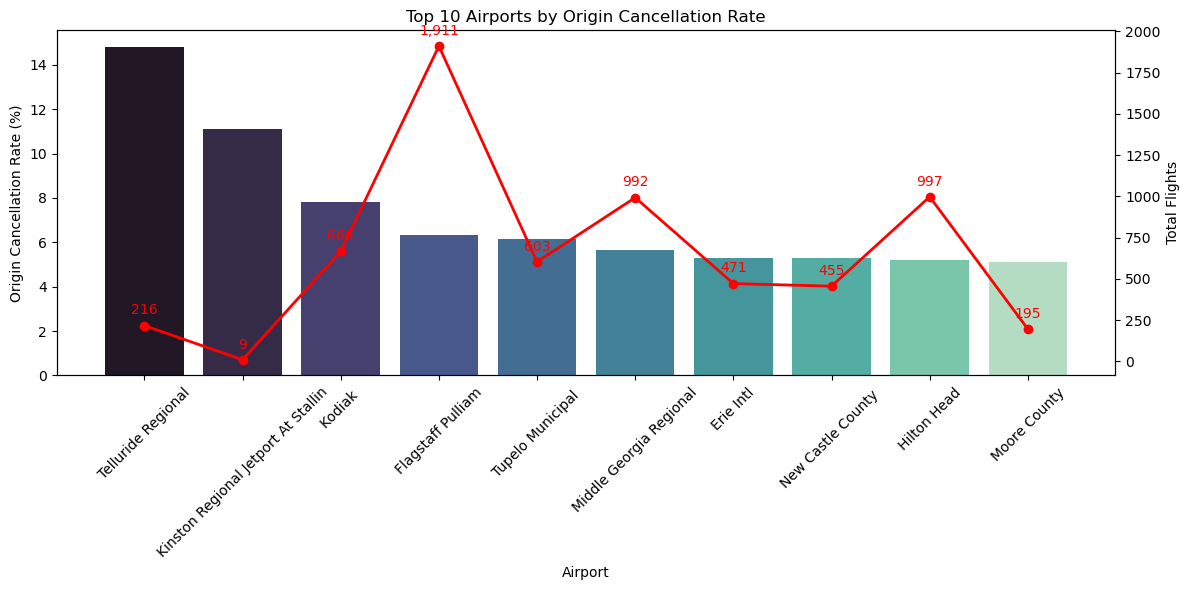

In [69]:
# Filter for origin flights only
df_origin = df_airport_cancel[df_airport_cancel['flight_type'] == 'origin']

# Select top 10 airports by cancel_rate
top10_airports = df_origin.sort_values(by='cancel_rate', ascending=False).head(10)

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barplot for cancellation rate
sns.barplot(x='airportname', y='cancel_rate', data=top10_airports, palette='mako', ax=ax1)
ax1.set_xlabel('Airport')
ax1.set_ylabel('Origin Cancellation Rate (%)', color='black')
ax1.set_title('Top 10 Airports by Origin Cancellation Rate')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(top10_airports['airportname'], rotation=45)

# Create secondary y-axis for total flights
ax2 = ax1.twinx()
ax2.plot(top10_airports['airportname'], top10_airports['total_flights'],
         color='red', marker='o', linewidth=2, label='Total Flights')

# Add value labels above each red dot
for i, val in enumerate(top10_airports['total_flights']):
    ax2.text(i, val + 50, f"{int(val):,}", ha='center', va='bottom', fontsize=10, color='red')

ax2.set_ylabel('Total Flights', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Finalize and save
plt.tight_layout()
save_plot("cancel_by_airport_top10_with_total_flights")
plt.show()


Based on the analysis of **airport-level origin flight cancellations**, the top 10 airports with the highest cancellation rates show a strong pattern of operational inefficiencies in smaller regional hubs.

At the top of the list, **Telluride Regional Airport (Colorado)** has the highest cancellation rate at **14.81%**, followed by **Kinston Regional Jetport (North Carolina)** at **11.11%**, and **Kodiak Airport (Alaska)** at **7.81%**. These airports are typically smaller, serve fewer flights and are located in areas with more volatile weather or limited operational capacity which may contribute to their higher cancellation rates.

A notable observation is that these airports also operate **relatively low total flight volumes** such as Kinston only had 9 flights, of which 1 was cancelled. This low volume magnifies the impact of even a few cancellations on the overall rate. For instance, a small number of disruptions due to weather, aircraft availability or infrastructure constraints can cause a substantial percentage increase in cancellations.

The red line in the chart shows total flights and it confirms that airports with **lower total operations often experience higher variability in cancellation rate**. This trend may suggest that **smaller regional airports are more vulnerable to cancellations** possibly due to limited resources such as fewer backup aircraft, constrained ground staff or single runway dependencies.

In contrast, larger airports with higher total flights tend to have **lower cancellation rates**, as they benefit from operational buffers and greater flexibility in handling disruptions.

In conclusion, while major hub airports tend to maintain schedule stability due to scale and redundancy, **smaller regional airports are disproportionately affected by operational or environmental issues** which leading to significantly higher cancellation percentages despite relatively low flight counts. This insight is useful for airlines optimizing routes and for passengers planning travel through smaller hubs.


In [70]:
# Step 1: Filter for origin flights only
df_origin = df_airport_cancel[df_airport_cancel['flight_type'] == 'origin']

# Step 2: Get top 5 airports by cancel_rate for origin flights
top5_airports = df_origin.sort_values(by='cancel_rate', ascending=False).head(5)

# Step 3: Extract airport names of top 5
top5_codes = top5_airports['airportname'].tolist()

# Step 4: Add Group column to full DataFrame based on airportname presence in top5_codes
df_airport_cancel['Group'] = df_airport_cancel['airportname'].apply(lambda x: 'Top 5' if x in top5_codes else 'Others')

# Step 5: If you want to drop rows with missing cancel_rate values, just use:
df_airport_cancel_clean = df_airport_cancel.dropna(subset=['cancel_rate'])

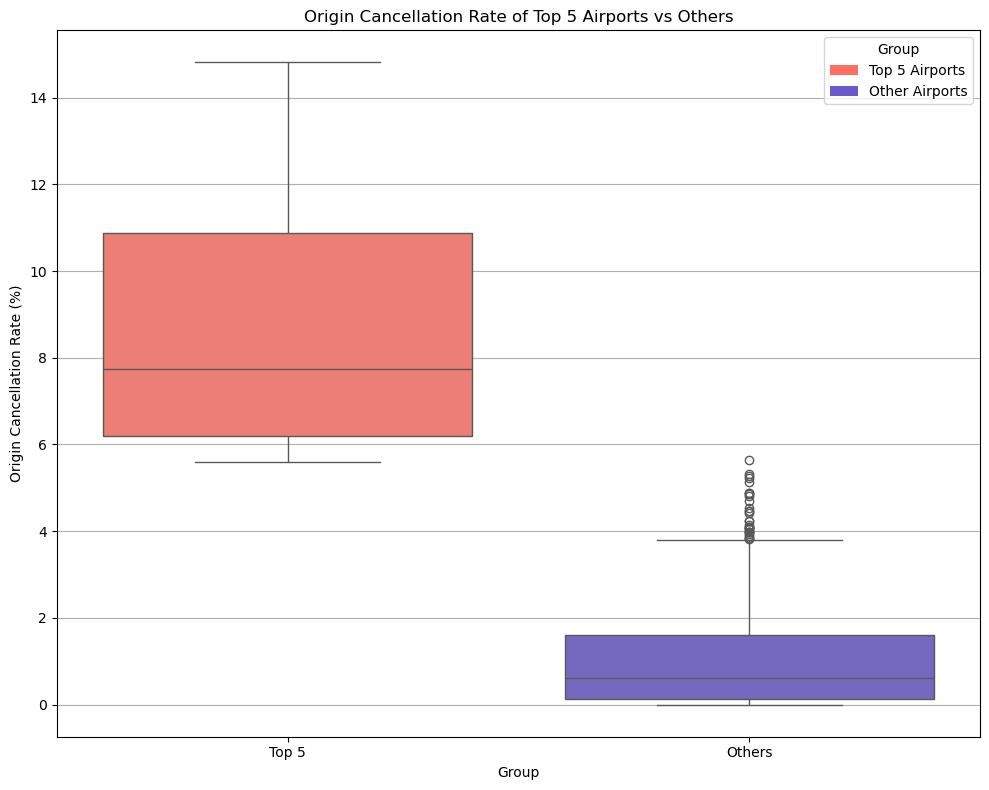

In [162]:
# Plot setup
plt.figure(figsize=(10, 8))
sns.boxplot(
    x='Group',
    y='cancel_rate',
    data=df_airport_cancel_clean,
    palette=['#FF6F61', '#6A5ACD'],
    order=['Top 5', 'Others']
)

# Title and axis labels
plt.title('Origin Cancellation Rate of Top 5 Airports vs Others')
plt.xlabel('Group')
plt.ylabel('Origin Cancellation Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Add custom legend
legend_elements = [
    Patch(facecolor='#FF6F61', label='Top 5 Airports'),
    Patch(facecolor='#6A5ACD', label='Other Airports')
]
plt.legend(handles=legend_elements, title='Group', loc='upper right')
save_plot("cancel_by_airport_origin_distribution")
plt.tight_layout()
plt.show()


The boxplot illustrates the distribution of origin flight cancellation rates between the Top 5 airports with the highest cancellation rates and all other airports. By segmenting the data into these two groups, the visualization enables a clear comparison of variability and central tendency in cancellation performance. This comparison helps highlight whether high cancellation behavior is concentrated within a few specific airports or more evenly spread across the network. To validate the visual finding statistically, perform a two-sample t-test.

Hypotheses: Given a $\alpha$ of 0.05, and hypothesis of,
$$
H_0 \text{: There is no significant difference in the mean origin cancellation rate between the Top 5 airlines and other.}
\newline
H_1 \text{: There is a significant difference in the mean origin cancellation rate between the Top 5 airlines and other.}
$$



Levene’s test is used to assess whether the variances of two groups are statistically equal. This step is important to select a more appropriate test like Welch’s t-test that does not require equal variances.

In [87]:
# Levene's Test for Equal Variances

# Filter for origin flights only
df_origin = df_airport_cancel_clean[df_airport_cancel_clean['flight_type'] == 'origin']

# Split into two groups based on the 'Group' column
top5_data = df_origin[df_origin['Group'] == 'Top 5']['cancel_rate']
others_data = df_origin[df_origin['Group'] == 'Others']['cancel_rate']

# Perform Levene's test for equal variances
stat, p = levene(top5_data, others_data)

print("Levene’s Test for Equal Variances (Origin Cancellation Rate)")
print(f"Test Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Interpret
if p < 0.05:
    print("Result: P-value < Hnull is rejected so there are variances are significantly different so do not assume equal variance.")
else:
    print("Result: P-value > Hnull is accepted so no significant difference so equal variance assumption is reasonable.")


Levene’s Test for Equal Variances (Origin Cancellation Rate)
Test Statistic: 12.9801
P-value: 0.0004
Result: P-value < Hnull is rejected so there are variances are significantly different so do not assume equal variance.


Welch’s t-test is a variation of the independent two-sample t-test that does not assume equal variances between groups. The cancellation rate data for one group does not influence or overlap with the other group.

In [110]:
# Wechl's t-test for unequal variances

# Filter to origin flights only
df_origin = df_airport_cancel_clean[df_airport_cancel_clean['flight_type'] == 'origin']

# Split data for Top 5 and Others using 'cancel_rate' column
top5_data = df_origin[df_origin['Group'] == 'Top 5']['cancel_rate']
others_data = df_origin[df_origin['Group'] == 'Others']['cancel_rate']

# Perform Welch's t-test (unequal variance)
t_stat, p_value = ttest_ind(top5_data, others_data, equal_var=False)

# Print results
print("Welch's t-test: Original Cancellation Rate - Top 5 Airports vs Others")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Result: P-value < Hnull is rejected so there are significant difference in origin cancellation rates between Top 5 airports and Others.")
else:
    print("Result: P-value > Hnull is accepted so no significant difference in origin cancellation rates between Top 5 airports and Others.")


Welch's t-test: Original Cancellation Rate - Top 5 Airports vs Others
T-statistic: 4.8924
P-value: 0.0080
Result: P-value < Hnull is rejected so there are significant difference in origin cancellation rates between Top 5 airports and Others.


### 3.b Airport of Destination

In [94]:
# Filter for destination cancellation rates only
df_dest = df_airport_cancel_clean[df_airport_cancel_clean['flight_type'] == 'dest']

# Sort and select top 5 airports by destination cancellation rate
top5 = df_dest.sort_values(by='cancel_rate', ascending=False).head(5)
top5_codes = top5['airportname'].tolist()

print("Top 5 Airports by Destination Cancellation Rate:")
for index, row in top5.iterrows():
    print(f"{row['airportname']} ({row['city']}): {row['cancel_rate']:.2f}%")

Top 5 Airports by Destination Cancellation Rate:
Kinston Regional Jetport At Stallin (Kinston): 12.50%
Telluride Regional (Telluride): 10.19%
Kodiak  (Kodiak): 7.66%
Tupelo Municipal  (Tupelo): 5.96%
Flagstaff Pulliam (Flagstaff): 5.60%


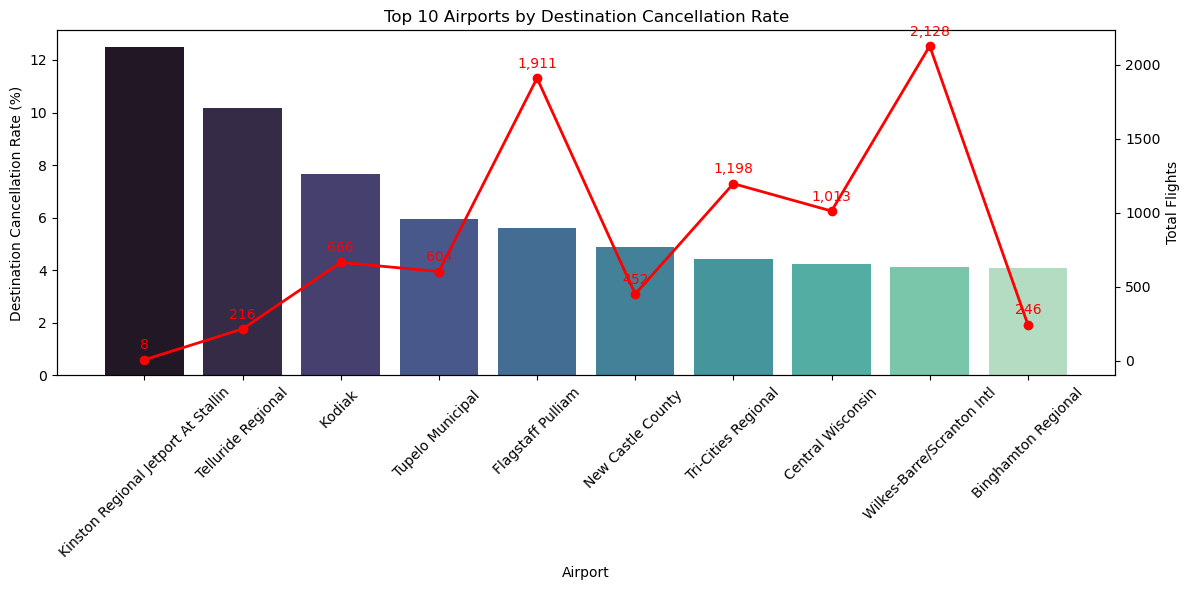

In [90]:
# Filter for destination flights only
df_dest = df_airport_cancel[df_airport_cancel['flight_type'] == 'dest']

# Select top 10 destination airports by cancellation rate
top10_dest_airports = df_dest.sort_values(by='cancel_rate', ascending=False).head(10)

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barplot for destination cancellation rate
sns.barplot(x='airportname', y='cancel_rate', data=top10_dest_airports, palette='mako', ax=ax1)
ax1.set_xlabel('Airport')
ax1.set_ylabel('Destination Cancellation Rate (%)', color='black')
ax1.set_title('Top 10 Airports by Destination Cancellation Rate')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(top10_dest_airports['airportname'], rotation=45)

# Create secondary y-axis for total destination flights
ax2 = ax1.twinx()
ax2.plot(top10_dest_airports['airportname'], top10_dest_airports['total_flights'],
         color='red', marker='o', linewidth=2, label='Total Flights')

# Add value labels above each red dot
for i, val in enumerate(top10_dest_airports['total_flights']):
    ax2.text(i, val + 50, f"{int(val):,}", ha='center', va='bottom', fontsize=10, color='red')

ax2.set_ylabel('Total Flights', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Finalize and save
plt.tight_layout()
save_plot("cancel_by_destination_airport_top10_with_total_flights")
plt.show()

Based on the analysis of **airport-level destination flight cancellations**, the top 10 airports with the highest cancellation rates highlight patterns typically associated with smaller, regional airports but with important exceptions.

**Kinston Regional Jetport (North Carolina)** tops the list with a **12.50%** cancellation rate from just 8 total destination flights. **Telluride Regional Airport (Colorado)** follows with **10.19%** from 216 flights, and **Kodiak Airport (Alaska)** reports **7.66%** from 666 flights. These cases show how smaller airports, especially those with fewer operations can experience disproportionately high cancellation rates often due to weather conditions, limited infrastructure or lack of operational redundancies.

However, **not all low-volume airports exhibit high cancellation rates**. For instance, **Binghamton Regional** had **246 flights** and a modest **4.07%** cancellation rate. This suggests that while low flight volume can **amplify the percentage impact** of cancellations. **Other operational factors also play a role** such as reliability of service, route importance or airline presence.

The accompanying chart supports this where the red line showing total flights reveals variability. Some airports with high cancellation rates have very low flight counts like Kinston while others like Flagstaff manage higher volumes with a moderate rate.

In summary, while there is a **tendency** for smaller airports to show **higher cancellation rates**, this is **not universal**. The findings highlight how operational vulnerability, flight frequency and infrastructure all interplay to shape cancellation behavior at destination airports. This insight may inform airline route planning and traveler expectations, especially when flying into less trafficked regional hubs.


In [99]:
# Step 1: Filter for destination flights only
df_dest = df_airport_cancel[df_airport_cancel['flight_type'] == 'dest']

# Step 2: Get top 5 airports by cancel_rate for destination flights
top5_airports_dest = df_dest.sort_values(by='cancel_rate', ascending=False).head(5)

# Step 3: Extract airport names of top 5 destination airports
top5_codes = top5_airports_dest['airportname'].tolist()

# Step 4: Add Group column to the full DataFrame based on top 5 destination airports
df_airport_cancel['Group'] = df_airport_cancel['airportname'].apply(lambda x: 'Top 5' if x in top5_codes else 'Others')

# Step 5: Filter again for destination flights only (with Group info now added)
df_dest = df_airport_cancel[df_airport_cancel['flight_type'] == 'dest']

# Step 6: Drop rows with missing cancel_rate values
df_dest_clean = df_dest.dropna(subset=['cancel_rate'])

# Step 7: Final preview of the cleaned destination-only dataset
df_dest_clean.head()


,airportname,city,state,country,latitude,longitude,flight_type,cancellations,total_flights,cancel_rate,Group
0,Adams,Little Rock,AR,USA,34.729396,-92.224246,dest,74,15392,0.48,Others
1,Akron-Canton Regional,Akron,OH,USA,40.916312,-81.442466,dest,150,8225,1.82,Others
4,Aspen-Pitkin Co/Sardy,Aspen,CO,USA,39.223160,-106.868845,dest,183,4936,3.71,Others
6,Bert Mooney,Butte,MT,USA,45.954795,-112.497460,dest,0,790,0.00,Others
7,Bethel,Bethel,AK,USA,60.779776,-161.837998,dest,29,943,3.08,Others


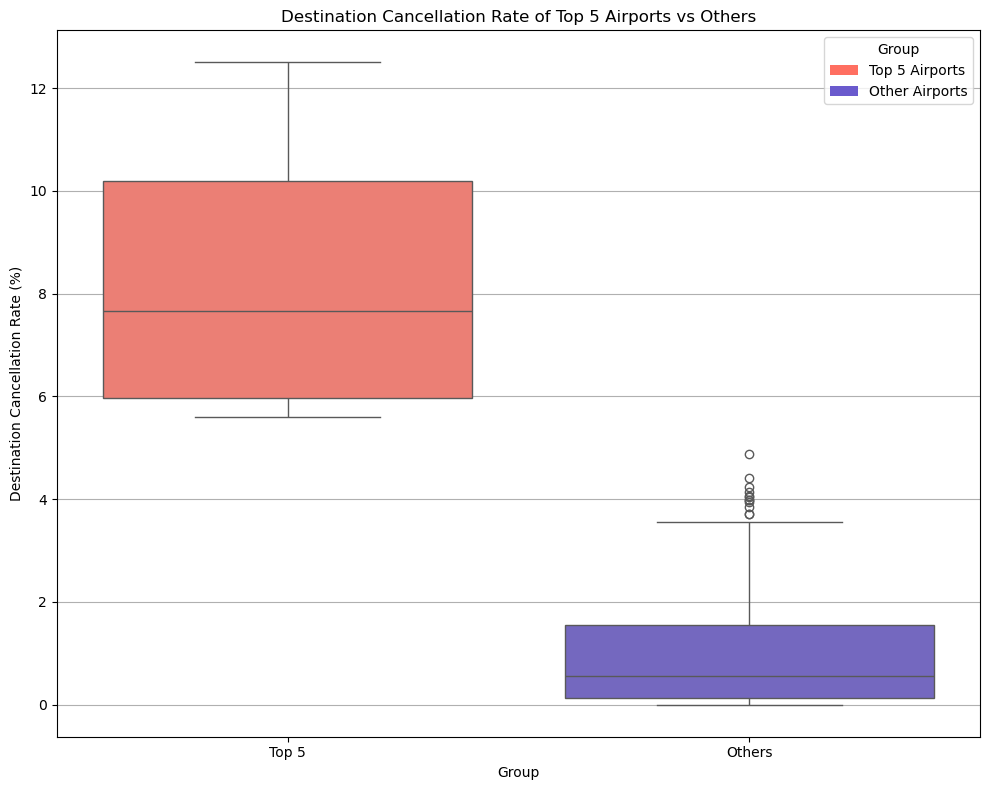

In [163]:
# Plot destination cancellation rate with Top 5 first
plt.figure(figsize=(10, 8))
sns.boxplot(
    x='Group',
    y='cancel_rate',
    data=df_dest_clean,
    palette=['#FF6F61', '#6A5ACD'],
    order=['Top 5', 'Others']
)

# Title and axis labels
plt.title('Destination Cancellation Rate of Top 5 Airports vs Others')
plt.xlabel('Group')
plt.ylabel('Destination Cancellation Rate (%)')
plt.grid(axis='y')

# Add custom legend
legend_elements = [
    Patch(facecolor='#FF6F61', label='Top 5 Airports'),
    Patch(facecolor='#6A5ACD', label='Other Airports')
]
plt.legend(handles=legend_elements, title='Group', loc='upper right')
save_plot("cancel_by_airport_destination_distribution")
plt.tight_layout()
plt.show()


The boxplot illustrates the distribution of destination flight cancellation rates between the Top 5 airports with the highest cancellation rates and all other airports. By segmenting the data into these two groups, the visualization enables a clear comparison of variability and central tendency in cancellation performance. This comparison helps highlight whether high cancellation behavior is concentrated within a few specific airports or more evenly spread across the network. To validate the visual finding statistically, perform a two-sample t-test.

Hypotheses: Given a $\alpha$ of 0.05, and hypothesis of,
$$
H_0 \text{: There is no significant difference in the mean destination cancellation rate between the Top 5 airlines and other.}
\newline
H_1 \text{: There is a significant difference in the mean destination cancellation rate between the Top 5 airlines and other.}
$$

Levene’s test is used to assess whether the variances of two groups are statistically equal. This step is important to select a more appropriate test like Welch’s t-test that does not require equal variances.

In [107]:
from scipy.stats import levene

# Levene's Test for Equal Variances (Destination Cancellation Rate)

# Use the correct DataFrame and column name
df_dest = df_dest_clean

# Split into two groups based on the 'Group' column
top5_data = df_dest[df_dest['Group'] == 'Top 5']['cancel_rate']
others_data = df_dest[df_dest['Group'] == 'Others']['cancel_rate']

# Perform Levene's test for equal variances
stat, p = levene(top5_data, others_data)

print("Levene’s Test for Equal Variances (Destination Cancellation Rate)")
print(f"Test Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("Result: P-value < 0.05, so H₀ is rejected — variances are significantly different.")
else:
    print("Result: P-value ≥ 0.05, so fail to reject H₀ — equal variance assumption is reasonable.")


Levene’s Test for Equal Variances (Destination Cancellation Rate)
Test Statistic: 13.2085
P-value: 0.0003
Result: P-value < 0.05, so H₀ is rejected — variances are significantly different.


In [ ]:
from scipy.stats import ttest_ind

# Split data for Top 5 and Others using 'cancel_rate' column
top5_data = df_dest_clean[df_dest_clean['Group'] == 'Top 5']['cancel_rate']
others_data = df_dest_clean[df_dest_clean['Group'] == 'Others']['cancel_rate']

# Perform Welch's t-test (assumes unequal variances)
t_stat, p_value = ttest_ind(top5_data, others_data, equal_var=False)

# Print results
print("Welch's t-test: Destination Cancellation Rate - Top 5 Airports vs Others")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Result: Significant difference in destination cancellation rates between Top 5 airports and Others.")
else:
    print("Result: No significant difference in destination cancellation rates between Top 5 airports and Others.")


Welch's t-test: Destination Cancellation Rate - Top 5 Airports vs Others
T-statistic: 5.6581
P-value: 0.0047
Result: Significant difference in destination cancellation rates between Top 5 airports and Others.


### 3.b Both Original and Destination Cancellation

In [ ]:
# Pivot the data to get origin and dest cancellation rates as separate columns
df_pivot = df_airport_cancel_clean.pivot_table(
    index=['airportname', 'city', 'state', 'country', 'latitude', 'longitude'],
    columns='flight_type',
    values='cancel_rate'
).reset_index()

# Rename columns for clarity
df_pivot = df_pivot.rename(columns={
    'origin': 'origin_cancellation_rate',
    'dest': 'dest_cancellation_rate'
})

# Reattach the 'Group' column using top 5 airport names
df_pivot['Group'] = df_pivot['airportname'].apply(lambda x: 'Top 5' if x in top5_codes else 'Others')

# Drop rows with missing values in either cancellation rate
df_destination_clean = df_pivot.dropna(subset=['origin_cancellation_rate', 'dest_cancellation_rate'])

# Preview the result
df_destination_clean.head()


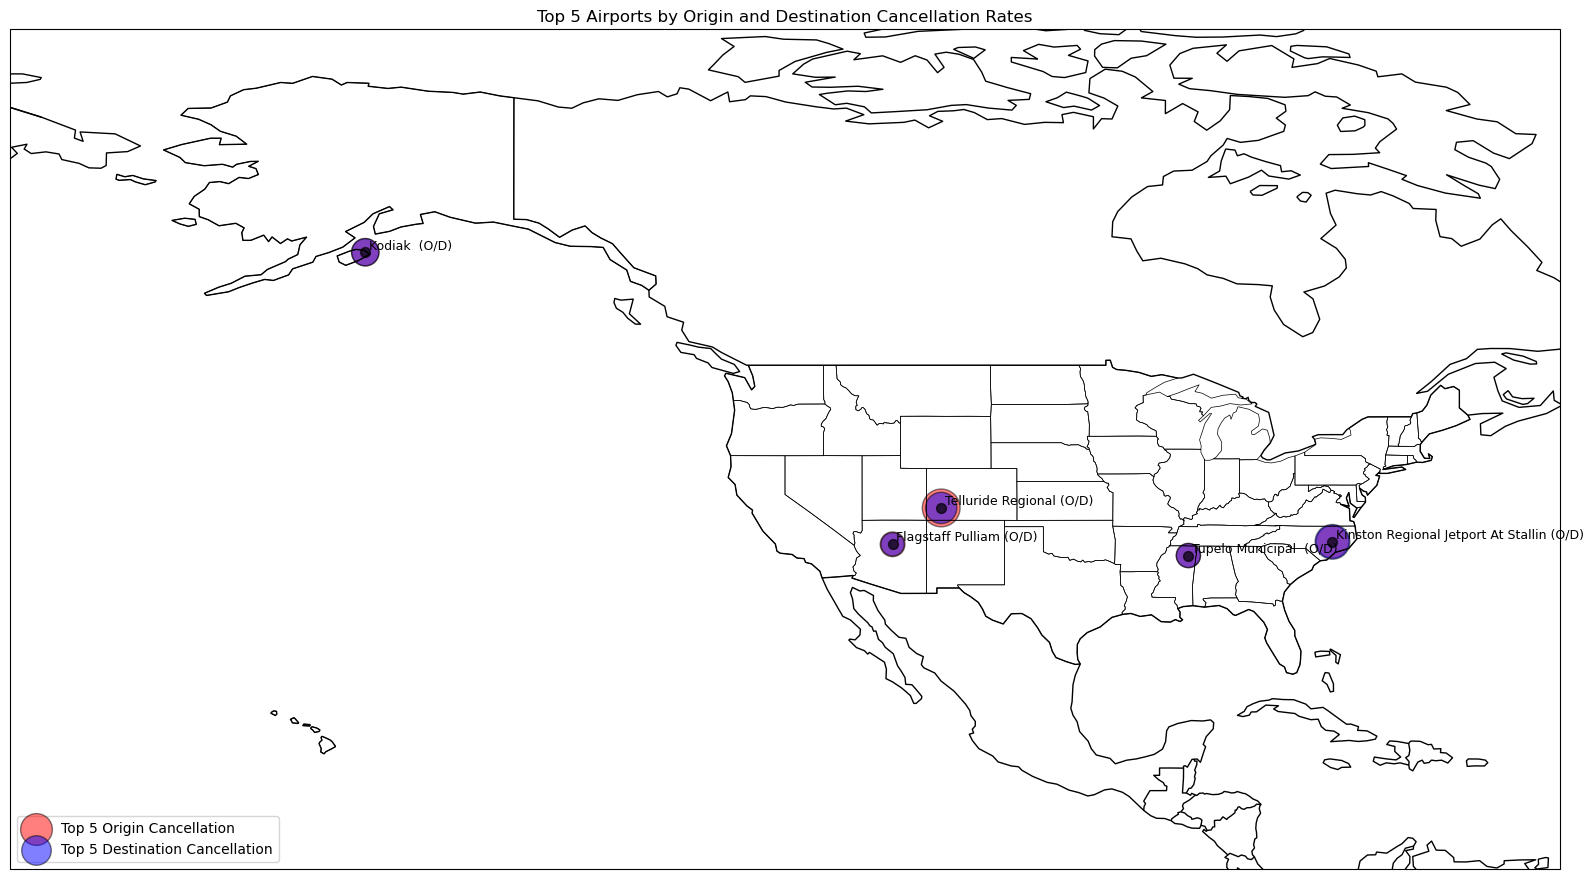

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Select top 5 by origin and destination cancellation rate from df_destination_clean
top5_origin = df_destination_clean.sort_values(by='origin_cancellation_rate', ascending=False).head(5)
top5_dest = df_destination_clean.sort_values(by='dest_cancellation_rate', ascending=False).head(5)

# Set up the map
plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.set_extent([-180, -60, 10, 75], crs=ccrs.PlateCarree())

# Plot top 5 origin cancellation airports
origin_scatter = ax.scatter(
    top5_origin['longitude'],
    top5_origin['latitude'],
    s=top5_origin['origin_cancellation_rate'] * 50,  # size scaled by cancellation rate
    color='red',
    alpha=0.5,
    label='Top 5 Origin Cancellation',
    edgecolor='k',
    transform=ccrs.PlateCarree()
)

# Plot top 5 destination cancellation airports
dest_scatter = ax.scatter(
    top5_dest['longitude'],
    top5_dest['latitude'],
    s=top5_dest['dest_cancellation_rate'] * 50,  # size scaled by cancellation rate
    color='blue',
    alpha=0.5,
    label='Top 5 Destination Cancellation',
    edgecolor='k',
    transform=ccrs.PlateCarree()
)

# Combine top 5 origin and destination airports to label
combined = pd.concat([top5_origin, top5_dest]).drop_duplicates(subset=['airportname'])

def get_label_type(row):
    is_origin = row['airportname'] in top5_origin['airportname'].values
    is_dest = row['airportname'] in top5_dest['airportname'].values
    if is_origin and is_dest:
        return '(O/D)'
    elif is_origin:
        return '(O)'
    elif is_dest:
        return '(D)'

combined['label'] = combined.apply(get_label_type, axis=1)

# Add labels on the map
for _, row in combined.iterrows():
    ax.scatter(row['longitude'], row['latitude'],
               s=50,
               color='black',
               alpha=0.7,
               edgecolor='k',
               transform=ccrs.PlateCarree())
    
    ax.text(row['longitude'] + 0.3, row['latitude'] + 0.3,
            f"{row['airportname']} {row['label']}",
            fontsize=9,
            color='black',
            transform=ccrs.PlateCarree())

plt.title('Top 5 Airports by Origin and Destination Cancellation Rates')
plt.legend(loc='lower left')
save_plot("top_5_airports_cancellation_map")
plt.show()


The plotted map visually highlights the top 5 airports with the highest cancellation rates for both origin and destination flights. Airports with high cancellation rates are shown in red for origin-based issues and blue for destination-related problems, with circle sizes scaled proportionally to their cancellation rates.

All of the top 5 airports overlap in both categories: Telluride Regional, Kinston Regional Jetport at Stallin, Kodiak, Flagstaff Pulliam, and Tupelo Municipal. This emphasizes that these airports consistently experience disruptions regardless of whether they serve as departure or arrival points. Such recurring hotspots may reflect systemic challenges such as weather vulnerabilities, operational inefficiencies, or limited infrastructure.

### 3.b Time Period - Month

In [ ]:
# 3B. Cancellation by Month

query_cancel_by_month = """
DROP TABLE IF EXISTS cancel_by_month;

CREATE TABLE cancel_by_month AS
SELECT
  month,
  COUNT(*) AS total_flights,
  SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) AS cancellation_count,
  ROUND(100.0 * SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancellation_rate_pct
FROM enriched_2007
WHERE month IS NOT NULL
GROUP BY month
ORDER BY month
"""

# Execute Hive query
cursor.execute("DROP TABLE IF EXISTS cancel_by_month")
cursor.execute("SET tez.runtime.io.sort.mb=128")
cursor.execute(query_cancel_by_month.split(';', 1)[1])


# Load to DataFrame
df_cancel_month = run_query("SELECT * FROM cancel_by_month")
df_cancel_month.columns = [col.split('.')[-1] for col in df_cancel_month.columns]

# Optional: Save to CSV
save_csv(df_cancel_month, "cancel_by_month")

df_cancel_month


,month,total_flights,cancellation_count,cancellation_rate_pct
0,1,500972,3650,0.73
1,2,489702,6206,1.27
2,3,589382,4490,0.76
3,4,570041,2568,0.45
4,5,591309,1533,0.26
5,6,583479,5607,0.96
6,7,606417,4085,0.67
7,8,613762,3496,0.57
8,9,567946,1615,0.28
9,10,598807,1954,0.33


In [ ]:
# 3B. Cancellation by Month and Day of Week
query_cancel_by_month_day = """
DROP TABLE IF EXISTS cancel_by_month_day;

CREATE TABLE cancel_by_month_day AS
SELECT
  month,
  CASE dayofweek
    WHEN 1 THEN 'Mon'
    WHEN 2 THEN 'Tue'
    WHEN 3 THEN 'Wed'
    WHEN 4 THEN 'Thu'
    WHEN 5 THEN 'Fri'
    WHEN 6 THEN 'Sat'
    WHEN 7 THEN 'Sun'
  END AS dayofweek,
  COUNT(*) AS total_flights,
  SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) AS cancellation_count
FROM enriched_2007
WHERE cancelled IS NOT NULL AND dayofweek IS NOT NULL
GROUP BY month, dayofweek
"""

# Execute query in Hive
cursor.execute("DROP TABLE IF EXISTS cancel_by_month_day")
cursor.execute(query_cancel_by_month_day.split(";", 1)[1])

# Load to DataFrame
df_cancel_by_month_day = run_query("SELECT * FROM cancel_by_month_day")
df_cancel_by_month_day.columns = [col.split('.')[-1] for col in df_cancel_by_month_day.columns]

# Optional: Save as CSV
save_csv(df_cancel_by_month_day, "cancel_by_month_day")

df_cancel_by_month_day


,month,dayofweek,total_flights,cancellation_count
0,1,Mon,82791,640
1,1,Tue,82102,384
2,1,Wed,82640,500
3,1,Thu,67727,606
4,1,Fri,67304,546
...,...,...,...,...
79,12,Wed,78529,364
80,12,Thu,79253,677
81,12,Fri,79220,660
82,12,Sat,83225,738


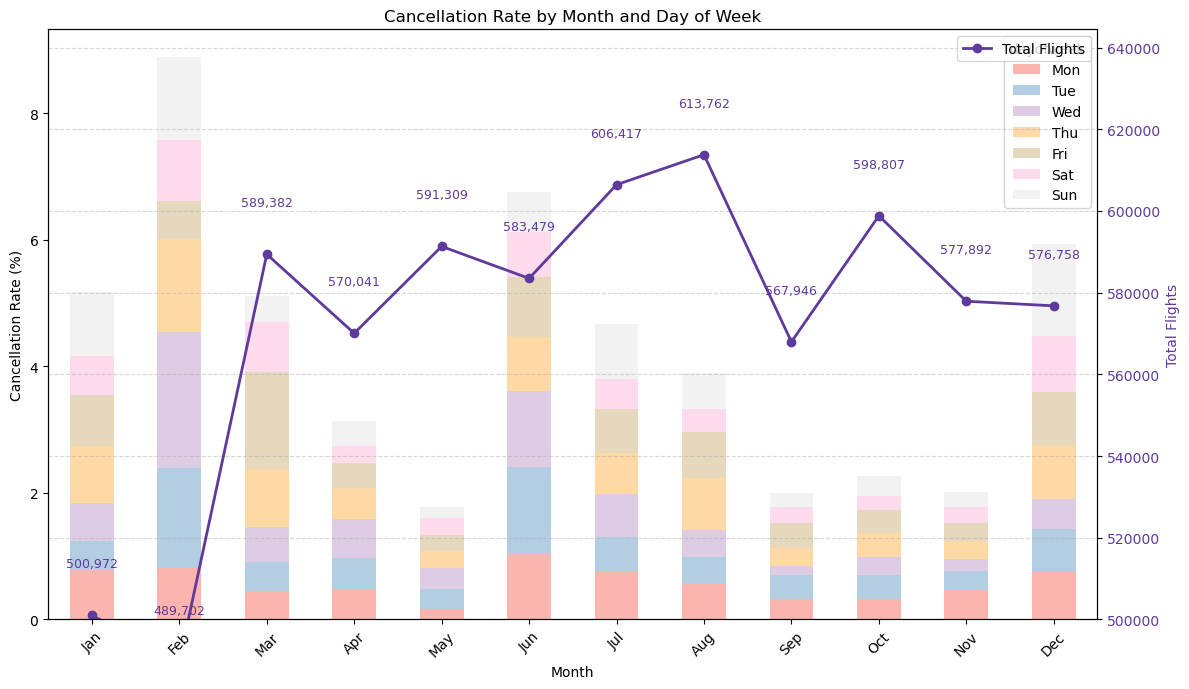

In [82]:
# Create cancellation rate column
df_cancel_by_month_day['cancel_rate'] = (df_cancel_by_month_day['cancellation_count'] / df_cancel_by_month_day['total_flights']) * 100

# Pivot to prepare for stacked bar chart
pivot_df = df_cancel_by_month_day.pivot_table(
    index='month',
    columns='dayofweek',
    values='cancel_rate',
    fill_value=0
)

# Reorder day columns for clarity
pivot_df = pivot_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

# Make sure month index is from 1 to 12
pivot_df.index = list(range(1, 13))

# Define month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 7))

# Stacked bar chart (soft pastel colormap)
pivot_df.plot(kind='bar', stacked=True, colormap='Pastel1', ax=ax1)

ax1.set_xlabel("Month")
ax1.set_ylabel("Cancellation Rate (%)")
ax1.set_title("Cancellation Rate by Month and Day of Week")
ax1.set_xticks(np.arange(12))
ax1.set_xticklabels(month_labels, rotation=45)

# Secondary axis for total flights
ax2 = ax1.twinx()

# Sort monthly data
df_cancel_month = df_cancel_month.sort_values('month')
x_vals = df_cancel_month['month'] - 1  # aligns with bar positions
y_vals = df_cancel_month['total_flights']

# Plot line
ax2.plot(
    x_vals,
    y_vals,
    color='#5D3A9B',
    marker='o',
    linewidth=2,
    label='Total Flights'
)

# Annotate values above points
for x, y in zip(x_vals, y_vals):
    ax2.text(x, y + 11000, f'{int(y):,}', ha='center', va='bottom', fontsize=9, color='#5D3A9B')

ax2.set_ylabel("Total Flights", color='#5D3A9B')
ax2.tick_params(axis='y', labelcolor='#5D3A9B')
ax2.set_ylim(500000, y_vals.max() * 1.05)

# Custom legend
legend_elements = [
    plt.Line2D([0], [0], color='#5D3A9B', lw=2, marker='o', label='Total Flights')
]
ax2.legend(handles=legend_elements, loc='upper right')

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
save_plot("cancel_by_month_dayofweek_combined")
plt.show()

# Optional: Save the processed data
save_csv(df_cancel_by_month_day, "cancel_by_month_dayofweek")


The analysis of flight cancellation rates across months and days of the week reveals interesting temporal patterns in flight operations for the year 2007. By calculating cancellation rates as the percentage of cancelled flights relative to total flights, periods with higher operational disruptions and potential factors influencing these patterns can be identify.

#### Monthly Trends

* **Cancellation rates vary by month**, with February showing the highest cancellation rate (1.27%) and May the lowest (0.26%).
* The first quarter (January to March) exhibits relatively higher cancellation rates compared to the mid-year months (April to June).
* There is a clear drop in cancellation rates in May (0.26%) and September (0.28%), which might be because the weather is better or there are fewer flights during these months.
* The year-end months like December (0.86%) and June (0.96%) show increased cancellation rates, possibly influenced by peak travel seasons, holidays or weather disruptions.

#### Day-of-Week Patterns Within Each Month

* When examining cancellation rates by day of week within each month, the data shows variability:

  * **Mondays and Thursdays tend to have higher cancellation rates** in several months.
  * **Saturdays and Sundays generally show lower cancellation rates**, which might be due to fewer flights or operational adjustments on weekends.
  * For example, in February, cancellations are higher on Tuesdays and Wednesdays, which matches the fact that February has the highest cancellation rate overall.
* The stacked bar chart helps to visualize how cancellation rates are distributed throughout the week for each month, highlighting specific days with elevated disruptions.

#### Flight Volume Context

* The line on the second y-axis shows how many flights there were each month, which helps understand the data better.
* Even if the cancellation rate is high, some months like July and August still have a lot of flights overall.
* On the other hand, months with fewer flights, like May, tend to have lower cancellation rates too.
* However, even though February has the highest cancellation rate, it actually has fewer total flights compared to other months.

#### Implications and Possible Causes

* **Seasonality and weather events** likely impact cancellation rates, particularly in winter months and hurricane seasons.
* **Operational capacity and staffing** might also vary across the week and months, affecting cancellations.
* The higher cancellation rates on Mondays and Thursdays could be related to the start and mid-point of the business week when operational disruptions or maintenance might be scheduled.
* Airlines and airport authorities can leverage this insight to optimize scheduling, allocate resources, and improve contingency planning on days/months prone to higher cancellations.



### 3.b Time Period - Day of Month

From the graph above, May exhibits the lowest cancellation rates despite a moderate travel volume. Therefore, focusing the analysis on May can help identify patterns throughout the month that might contribute to improving cancellation rates in other months.

In [ ]:
# 3D. Cancellation Rate by Day of Month (May only)

query_cancel_by_day_may = """
DROP TABLE IF EXISTS cancel_by_day_may;

CREATE TABLE cancel_by_day_may AS
SELECT
  dayofmonth,
  CASE
    WHEN dayofweek = 1 THEN 'Mon'
    WHEN dayofweek = 2 THEN 'Tue'
    WHEN dayofweek = 3 THEN 'Wed'
    WHEN dayofweek = 4 THEN 'Thu'
    WHEN dayofweek = 5 THEN 'Fri'
    WHEN dayofweek = 6 THEN 'Sat'
    WHEN dayofweek = 7 THEN 'Sun'
  END AS dayofweek,
  COUNT(*) AS total_flights,
  SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) AS cancellation_count,
  ROUND(100.0 * SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancellation_rate_pct
FROM enriched_2007
WHERE month = 5 AND dayofmonth IS NOT NULL AND dayofweek IS NOT NULL
GROUP BY dayofmonth, dayofweek
ORDER BY dayofmonth
"""

# Execute Hive query
cursor.execute("DROP TABLE IF EXISTS cancel_by_day_may")
cursor.execute(query_cancel_by_day_may.split(";", 1)[1])

# Load into DataFrame
df_cancel_by_day_may = run_query("SELECT * FROM cancel_by_day_may")
df_cancel_by_day_may.columns = [col.split('.')[-1] for col in df_cancel_by_day_may.columns]

# Save as CSV
save_csv(df_cancel_by_day_may, "cancel_by_day_may")

df_cancel_by_day_may


,dayofmonth,dayofweek,total_flights,cancellation_count,cancellation_rate_pct
0,1,Tue,19229,84,0.44
1,2,Wed,19511,83,0.43
2,3,Thu,19739,52,0.26
3,4,Fri,19847,48,0.24
4,5,Sat,16774,63,0.38
5,6,Sun,18895,42,0.22
6,7,Mon,19804,64,0.32
7,8,Tue,19363,24,0.12
8,9,Wed,19621,53,0.27
9,10,Thu,19771,62,0.31


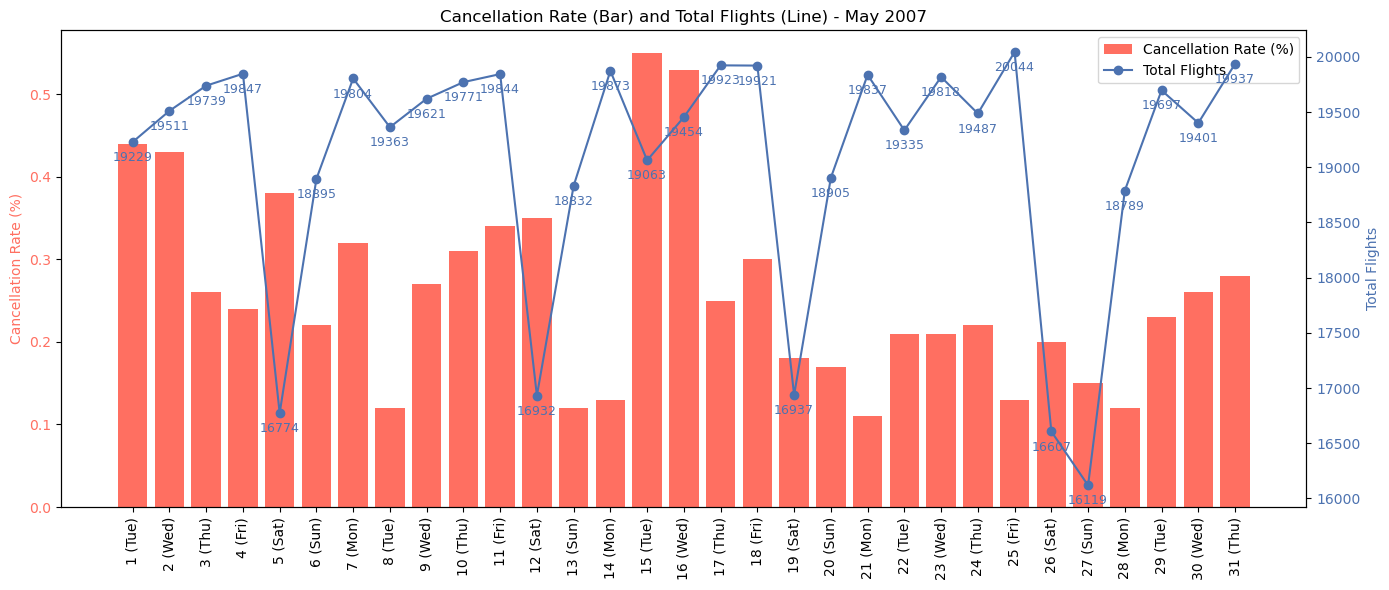

In [ ]:
# Prepare x-axis labels as "day (dow)" e.g. "1 (Mon)"
day_labels = [f"{day} ({dow})" for day, dow in zip(temp['DayOfMonth'], temp['DayOfWeek'])]

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for cancellation rate (left y-axis)
color_cancel = '#FF6F61'
ax1.bar(temp['DayOfMonth'], temp['CancellationRatePct'], color=color_cancel, label='Cancellation Rate (%)')
ax1.set_ylabel('Cancellation Rate (%)', color=color_cancel)
ax1.tick_params(axis='y', labelcolor=color_cancel)

# Set x-axis labels below bars, rotated 90 degrees
ax1.set_xticks(temp['DayOfMonth'])
ax1.set_xticklabels(day_labels, rotation=90, ha='center', va='top')  # va='top' ensures labels below axis line

# Line plot for total flights (right y-axis)
ax2 = ax1.twinx()
color_flights = '#4C72B0'
ax2.plot(temp['DayOfMonth'], temp['total_flights'], marker='o', color=color_flights, label='Total Flights')
ax2.set_ylabel('Total Flights', color=color_flights)
ax2.tick_params(axis='y', labelcolor=color_flights)

# Add value labels only for total flights
for x, y in zip(temp['DayOfMonth'], temp['total_flights']):
    ax2.text(x, y - 200, f"{y}", ha='center', va='bottom', fontsize=9, color=color_flights)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Set title and adjust layout
plt.title('Cancellation Rate (Bar) and Total Flights (Line) - May 2007')
plt.tight_layout()

# Save the plot
save_plot('cancellation_rate_bar_flights_line_may2007.png')


The data for May reveals that cancellation rates fluctuate throughout the month, with some days showing notably higher rates than others. For example, the 15th and 16th of May stand out with cancellation rates above 0.5%, which is significantly higher than the rest of the month. These spikes could indicate specific operational issues or external factors affecting those days.

In contrast, several days, such as the 8th, 13th, and 14th of May, exhibit much lower cancellation rates, close to or below 0.15%, despite maintaining a relatively high total flight volume. This suggests effective management or favorable conditions during those periods.

Overall, cancellation rates appear to vary independently of total flight counts on certain days, indicating that factors other than volume influence cancellations. The lowest cancellation rates generally occur in the first and last weeks of May, pointing toward potentially better performance or fewer disruptions during these times.

The day-of-week distribution also shows no consistent pattern correlating cancellations to specific weekdays, highlighting the importance of considering daily operational factors or external events in further analyses.

Below shows the cancellation rate for the days of the month.


| Day of Week   | Total Flights | Cancelled Flights | Cancellation Rate (%) |
| ------------- | ------------- | ----------------- | --------------------- |
| **Monday**    | 58,503        | 107               | **0.18%**             |
| **Tuesday**   | 77,688        | 299               | **0.38%**             |
| **Wednesday** | 78,805        | 332               | **0.42%**             |
| **Thursday**  | 78,917        | 262               | **0.33%**             |
| **Friday**    | 79,656        | 200               | **0.25%**             |
| **Saturday**  | 67,182        | 215               | **0.32%**             |
| **Sunday**    | 74,751        | 122               | **0.16%**             |


From the table above, Sunday recorded the lowest cancellation rate at 0.16%, followed closely by Monday at 0.18%, despite Sunday having a higher flight volume. In contrast, Wednesday showed the highest cancellation rate at 0.42%, with over 330 cancelled flights out of nearly 79,000 scheduled. This suggests potential operational or scheduling issues midweek, possibly due to air traffic congestion or cumulative delays. Interestingly, although Tuesday and Thursday had similar total flight volumes, Tuesday experienced more cancellations, pointing to day-specific factors. These insights could inform targeted improvements in staffing, scheduling, or weather-response protocols to reduce midweek cancellations.

In [ ]:
# 3.b Cancellation Rate by Scheduled Departure Time Period on Sunday in May

query_cancel_by_deptime_may_mon = """
SELECT
  CASE
    WHEN CRSDepTime BETWEEN 500 AND 1159 THEN 'Morning'
    WHEN CRSDepTime BETWEEN 1200 AND 1659 THEN 'Afternoon'
    WHEN CRSDepTime BETWEEN 1700 AND 2059 THEN 'Evening'
    WHEN (CRSDepTime >= 2100 AND CRSDepTime <= 2359) OR (CRSDepTime >= 0 AND CRSDepTime < 500) THEN 'Night'
    ELSE 'Unknown'
  END AS crsdeptime,
  SUM(CASE WHEN Cancelled > 0 THEN 1 ELSE 0 END) AS cancellation_count, 
  COUNT(*) AS total_flights,
  ROUND(100.0 * SUM(CASE WHEN Cancelled > 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancellation_rate_pct
FROM enriched_2007
WHERE
  Month = 5 AND DayOfWeek = 7
GROUP BY
  CASE
    WHEN CRSDepTime BETWEEN 500 AND 1159 THEN 'Morning'
    WHEN CRSDepTime BETWEEN 1200 AND 1659 THEN 'Afternoon'
    WHEN CRSDepTime BETWEEN 1700 AND 2059 THEN 'Evening'
    WHEN (CRSDepTime >= 2100 AND CRSDepTime <= 2359) OR (CRSDepTime >= 0 AND CRSDepTime < 500) THEN 'Night'
    ELSE 'Unknown'
  END
ORDER BY crsdeptime
"""

# Run query and load into DataFrame variable named temp_data
temp_data = run_query(query_cancel_by_deptime_may_mon)
temp_data.columns = [col.split('.')[-1] for col in temp_data.columns]

# Rename columns for clarity
temp_data = temp_data.rename(columns={
    'crsdeptime': 'ScheduledDepartureTime',
    'cancellation_count': 'CancellationCount',
    'total_flights': 'TotalFlights',
    'cancellation_rate_pct': 'CancellationRatePct'
})

# Save to CSV for documentation
save_csv(temp_data, 'cancel_by_deptime_may_sun')

temp_data

,ScheduledDepartureTime,CancellationCount,TotalFlights,CancellationRatePct
0,Afternoon,29,23637,0.12
1,Evening,27,17157,0.16
2,Morning,57,27919,0.20
3,Night,9,4038,0.22


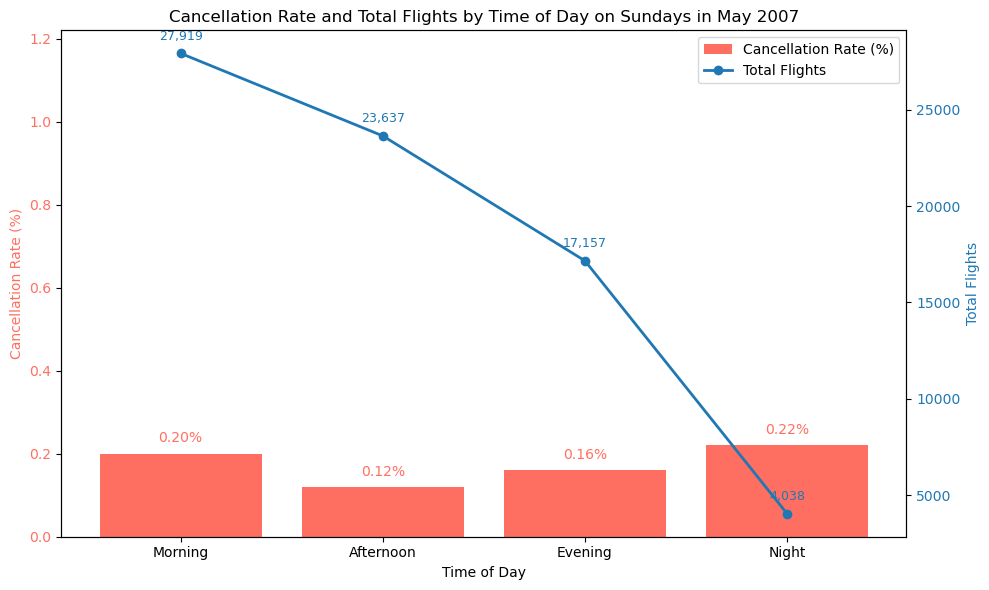

In [ ]:
# Define the time order for reindexing
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Reorder the DataFrame according to time_order
temp_data_ordered = temp_data.set_index('ScheduledDepartureTime').reindex(time_order).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for cancellation rate
bars = ax1.bar(temp_data_ordered['ScheduledDepartureTime'], temp_data_ordered['CancellationRatePct'], color='#FF6F61', label='Cancellation Rate (%)')

# Add cancellation rate values above bars
for i, val in enumerate(temp_data_ordered['CancellationRatePct']):
    ax1.text(i, val + 0.02, f"{val:.2f}%", ha='center', va='bottom', fontsize=10, color='#FF6F61')

ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Cancellation Rate (%)', color='#FF6F61')
ax1.tick_params(axis='y', labelcolor='#FF6F61')
ax1.set_ylim(0, temp_data_ordered['CancellationRatePct'].max() + 1)
ax1.set_title('Cancellation Rate and Total Flights by Time of Day on Sundays in May 2007')
ax1.set_xticklabels(temp_data_ordered['ScheduledDepartureTime'], rotation=0)

# Create secondary y-axis for total flights
ax2 = ax1.twinx()
ax2.plot(temp_data_ordered['ScheduledDepartureTime'], temp_data_ordered['TotalFlights'], color='#1f77b4', marker='o', linewidth=2, label='Total Flights')
ax2.set_ylabel('Total Flights', color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4')

# Add total flights values above points
for i, val in enumerate(temp_data_ordered['TotalFlights']):
    ax2.text(i, val + max(temp_data_ordered['TotalFlights']) * 0.02, f"{val:,}", ha='center', va='bottom', fontsize=9, color='#1f77b4')

# Legends combined
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper right')

plt.tight_layout()

# Save plot using your custom utility
save_plot('cancellation_rate_and_total_flights_sunday_may_2007.png')

plt.show()


The cancellation rates on Sundays in May 2007 vary across different scheduled departure time periods. The highest cancellation rate occurs during the Night period (0.22%), followed closely by the Morning period (0.20%). Afternoon flights show the lowest cancellation rate at 0.12%. Despite the Night period having the highest cancellation rate, it also has the lowest total flight volume, which could contribute to greater variability in cancellation percentage. The Morning period, with the highest total flights (27,919), also experiences a relatively high cancellation rate, indicating potential operational challenges during peak morning hours. Afternoon flights appear to be the most reliable with the largest number of flights and the lowest cancellation rate. This analysis suggests targeted improvements could be focused on Morning and Night departure windows to reduce cancellations on Sundays.



## Problematic Routes

### **4.A Identify specific routes (origin-destination pairs), carriers, or flight numbers that show consistently poor performance.**

To improve airline operational efficiency and passenger satisfaction, identifying specific flight routes, carriers, or flight numbers that consistently exhibit poor performance is essential. Poor performance is defined by high cancellation rates and significant delays in arrival or departure times. In this analysis, routes where the average arrival delay or departure delay exceeds 15 minutes are classified as problematic. By examining detailed flight data, routes with frequent cancellations and substantial delays can be identified, revealing potential operational bottlenecks or systemic issues. This information enables stakeholders to allocate resources and implement targeted interventions to enhance service reliability and overall airline performance.

In [ ]:
cursor.execute("DROP TABLE IF EXISTS high_delay_routes_top20")
cursor.execute("DROP TABLE IF EXISTS high_delay_routes_intermediate")

cursor.execute("""
CREATE TABLE high_delay_routes_intermediate AS
SELECT
    originairportname AS Origin,
    destairportname AS Dest,
    carrierdescription AS Description,
    flightnum AS FlightNumber,
    COUNT(*) AS total_flights,
    SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) AS cancellation_count,
    ROUND(100.0 * SUM(CASE WHEN cancelled = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancel_rate_pct,
    AVG(arrdelay) AS avg_arrival_delay,
    AVG(depdelay) AS avg_departure_delay
FROM enriched_2007
GROUP BY originairportname, destairportname, carrierdescription, flightnum
HAVING COUNT(*) >= 100
   AND (AVG(arrdelay) > 15 OR AVG(depdelay) > 15)
""")

# HIGH DELAY ROUTES TOP 20 TABLE

cursor.execute("""
CREATE TABLE high_delay_routes_top20 AS
SELECT *
FROM high_delay_routes_intermediate
ORDER BY cancel_rate_pct DESC, avg_arrival_delay DESC, avg_departure_delay DESC
LIMIT 20
""")

cursor.execute("DROP TABLE high_delay_routes_intermediate")

df_high_delay_routes = run_query("SELECT * FROM high_delay_routes_top20")
save_csv(df_high_delay_routes, "high_delay_routes_with_cancellations_top20")

df_high_delay_routes


In [169]:
df_high_delay_routes

,high_delay_routes_top20.origin,high_delay_routes_top20.dest,high_delay_routes_top20.description,high_delay_routes_top20.flightnumber,high_delay_routes_top20.total_flights,high_delay_routes_top20.cancellation_count,high_delay_routes_top20.cancel_rate_pct,high_delay_routes_top20.avg_arrival_delay,high_delay_routes_top20.avg_departure_delay
0,Detroit Metropolitan-Wayne County,Newark Intl,Northwest Airlines Inc.,656,178,48,26.97,44.165354,32.638462
1,Newark Intl,Detroit Metropolitan-Wayne County,Northwest Airlines Inc.,661,248,54,21.77,35.793814,28.391753
2,Austin Straubel International,Chicago O'Hare International,Mesa Airlines Inc.,7205,216,46,21.30,20.852941,19.429412
3,Chicago O'Hare International,Austin Straubel International,Mesa Airlines Inc.,7205,220,43,19.55,19.830508,20.960452
4,Newark Intl,Detroit Metropolitan-Wayne County,Northwest Airlines Inc.,649,147,26,17.69,33.619835,25.528926
5,Central Illinois Regional,Chicago O'Hare International,Mesa Airlines Inc.,7308,137,24,17.52,23.008850,23.176991
6,Aspen-Pitkin Co/Sardy,Phoenix Sky Harbor International,Mesa Airlines Inc.,2949,126,22,17.46,16.778846,20.509615
7,Lehigh Valley International,Chicago O'Hare International,Mesa Airlines Inc.,7210,121,21,17.36,38.020000,40.940000
8,Chicago O'Hare International,Fort Wayne International,Mesa Airlines Inc.,7264,124,20,16.13,17.990385,22.298077
9,Gen Edw L Logan Intl,Washington Dulles International,Mesa Airlines Inc.,7192,111,17,15.32,16.968085,27.744681


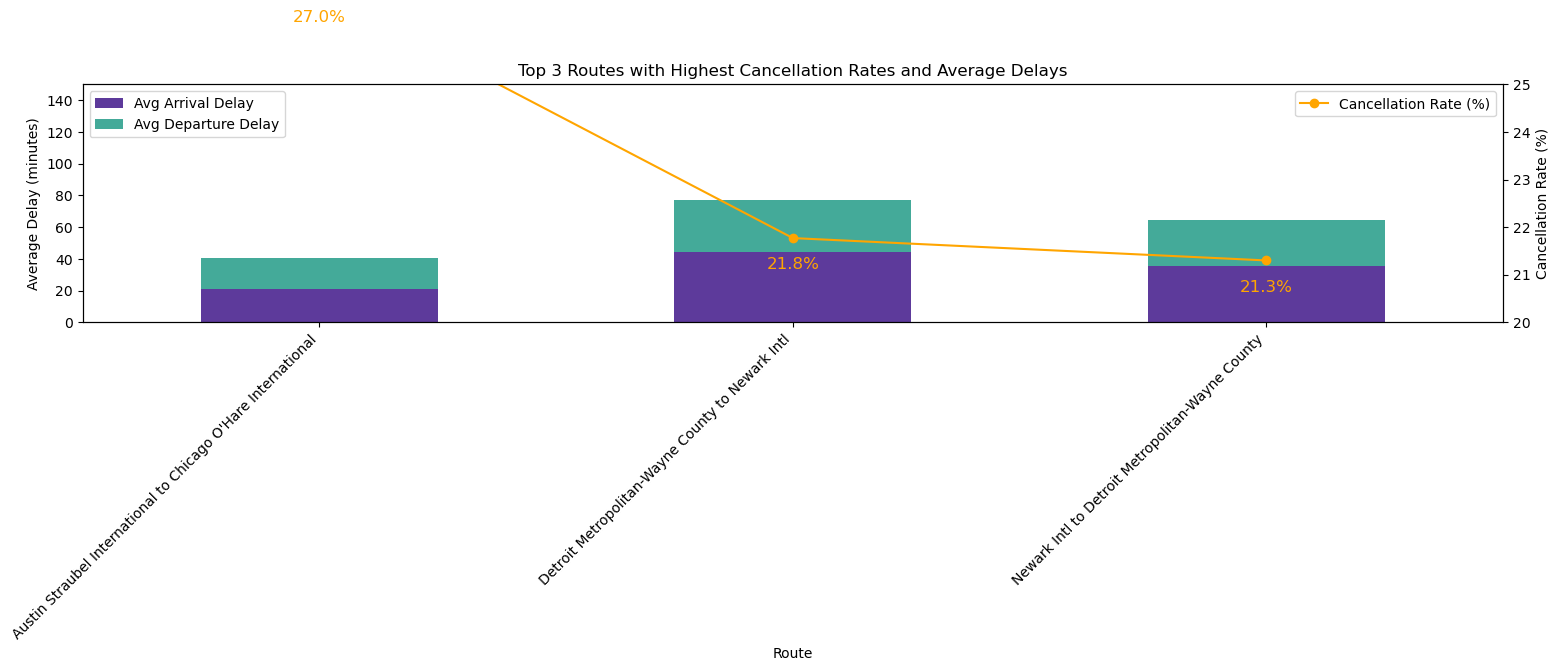

In [136]:
fig, ax1 = plt.subplots(figsize=(16, 8))  # Bigger figure

delay_pivot.plot(
    kind='bar',
    ax=ax1,
    color=['#5D3A9B', '#44AA99'],
    stacked=True,
    legend=False
)

ax1.set_ylim(0, 150)
ax1.set_xlabel('Route')
ax1.set_ylabel('Average Delay (minutes)')
ax1.set_title('Top 3 Routes with Highest Cancellation Rates and Average Delays')

# Smaller font size for x-axis labels on ax1
ax1.set_xticklabels(delay_pivot.index, rotation=45, ha='right', fontsize=10)

ax1.legend(['Avg Arrival Delay', 'Avg Departure Delay'], loc='upper left')

ax2 = ax1.twinx()
x_positions = range(len(top3_poor_routes))
cancel_rates = top3_poor_routes['high_delay_routes_top20.cancel_rate_pct']

ax2.plot(
    x_positions,
    cancel_rates,
    color='orange',
    marker='o',
    label='Cancellation Rate (%)'
)
ax2.set_ylabel('Cancellation Rate (%)')
ax2.set_ylim(20, 25)
ax2.set_xticks(x_positions)

# Smaller font size for x-axis labels on ax2 (match ax1)
ax2.set_xticklabels(delay_pivot.index, rotation=45, ha='right', fontsize=6)

ax2.legend(loc='upper right')

ax1.grid(False)
ax2.grid(False)

for x, y in zip(x_positions, cancel_rates):
    ax2.text(x, y - 0.4, f'{y:.1f}%', color='orange', ha='center', va='top', fontsize=12)

plt.tight_layout()

fig.savefig("top3_routes_cancellation_delay_plot.png", bbox_inches='tight')

plt.show()


The analysis focused on identifying specific origin-destination routes, carriers and flight numbers exhibiting consistently poor operational performance and characterized by high cancellation rates combined with significant average arrival and departure delays.

From the top 20 routes filtered by a minimum of 100 flights and average delays exceeding 15 minutes, the three routes with the highest cancellation rates were further examined:

1. **Detroit Metropolitan-Wayne County (DTW) to Newark Intl (EWR)**, operated by Northwest Airlines Inc., flight number 656, shows a cancellation rate of **26.97%**, with an average arrival delay of **44.17 minutes** and an average departure delay of **32.64 minutes**. This route clearly suffers from both frequent cancellations and substantial delays, indicating significant operational challenges.

2. The return route, **Newark Intl to Detroit Metropolitan-Wayne County**, Northwest Airlines Inc., flight 661, also exhibits poor performance, with a cancellation rate of **21.77%**, arrival delays averaging **35.79 minutes**, and departure delays around **28.39 minutes**.

3. The **Austin Straubel International (GRB) to Chicago O'Hare International (ORD)** route by Mesa Airlines Inc., flight 7205, has a cancellation rate of **21.30%** alongside average arrival and departure delays of approximately **20.85** and **19.43 minutes** respectively.

The bar plot clearly shows the substantial average arrival and departure delays on these routes with the line plot overlaying cancellation rates to illustrate the simultaneous impact of cancellations. The cancellation rates for these top routes exceed 20%, substantially higher than typical industry averages, and the delays consistently surpass 15 minutes, signaling systemic issues.

These findings suggest that certain routes—especially those operated by Northwest Airlines Inc. and Mesa Airlines Inc.—face operational bottlenecks possibly due to airport congestion, scheduling inefficiencies or other logistical challenges. The persistently high delays and cancellation rates imply that these routes are problematic both for airlines and passengers, likely contributing to lower service reliability and passenger satisfaction.

Such data-driven insights enable targeted interventions. Airlines and airport authorities can prioritize these routes for operational reviews, increased buffer times, resource allocation or infrastructure improvements to mitigate delays and reduce cancellations. Identifying specific flight numbers adds granularity for corrective action such as reviewing crew scheduling, maintenance issues or aircraft turnaround processes associated with these flights.



In [5]:
import pandas as pd

# Load CSV files
data = pd.read_csv('data/2007.csv')            # your main flight data
airports = pd.read_csv('data/airports.csv')    # airports info
carriers = pd.read_csv('data/carriers.csv')    # carriers info
plane_data = pd.read_csv('data/plane-data.csv')      # plane data

# Merge carrier description into data
data = data.merge(carriers, left_on='UniqueCarrier', right_on='Code', how='left')

# Group by Origin, Dest, Description, FlightNum and aggregate stats
grouped = data.groupby(['Origin', 'Dest', 'Description', 'FlightNum']).agg(
    total_flights=('FlightNum', 'size'),
    cancellation_count=('Cancelled', 'sum'),
    avg_arrival_delay=('ArrDelay', 'mean'),
    avg_departure_delay=('DepDelay', 'mean')
).reset_index()

# Calculate cancellation rate percentage
grouped['cancel_rate_pct'] = (grouped['cancellation_count'] / grouped['total_flights']) * 100

# Filter groups with at least 100 flights
filtered = grouped[grouped['total_flights'] >= 100]

# Filter for routes with delays > 15 minutes
filtered = filtered[(filtered['avg_arrival_delay'] > 15) | (filtered['avg_departure_delay'] > 15)]

# Sort and pick top 20
top20 = filtered.sort_values(by=['cancel_rate_pct', 'avg_arrival_delay', 'avg_departure_delay'], ascending=[False, False, False]).head(20)

# Now, add full airport names for Origin and Dest
airports_subset = airports[['iata', 'airport']].rename(columns={'iata': 'iata_code', 'airport': 'airport_name'})

# Merge Origin airport name
top20 = top20.merge(
    airports_subset.rename(columns={'iata_code': 'Origin', 'airport_name': 'origin_airport_name'}),
    on='Origin',
    how='left'
)

# Merge Dest airport name
top20 = top20.merge(
    airports_subset.rename(columns={'iata_code': 'Dest', 'airport_name': 'dest_airport_name'}),
    on='Dest',
    how='left'
)

# Show relevant columns
print(top20[['Origin', 'origin_airport_name', 'Dest', 'dest_airport_name', 'FlightNum', 'total_flights', 'cancel_rate_pct', 'avg_arrival_delay', 'avg_departure_delay']].head())


  Origin                 origin_airport_name Dest  \
0    BWI  Baltimore-Washington International  EWR   
1    AZO                    Kalamazoo County  ORD   
2    DTW   Detroit Metropolitan-Wayne County  EWR   
3    IAD     Washington Dulles International  EWR   
4    ORF               Norfolk International  EWR   

              dest_airport_name  FlightNum  total_flights  cancel_rate_pct  \
0                   Newark Intl       2491            360        30.555556   
1  Chicago O'Hare International       6906            107        29.906542   
2                   Newark Intl        656            205        26.829268   
3                   Newark Intl       1280            300        26.333333   
4                   Newark Intl       2970            214        25.700935   

   avg_arrival_delay  avg_departure_delay  
0          31.764000            35.168000  
1          25.680000            18.773333  
2          44.897959            33.380000  
3          32.859729            38.5

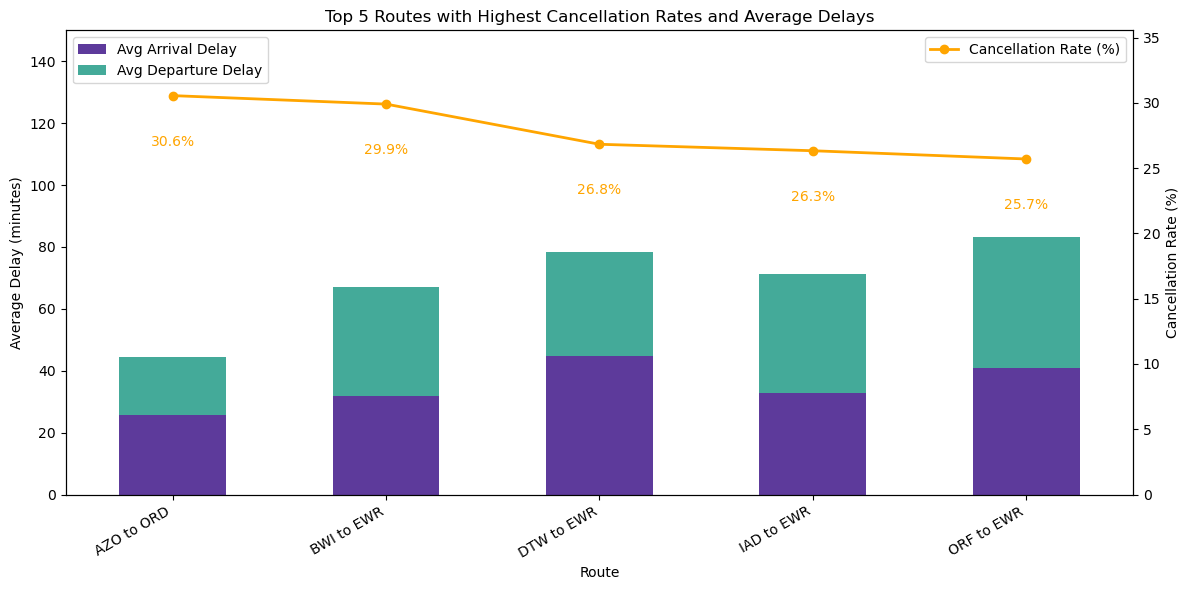

In [26]:
import os
import matplotlib.pyplot as plt

# Create output folder if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Get top 5 routes sorted by cancellation rate descending
top5_poor_routes = top20.sort_values(by='cancel_rate_pct', ascending=False).head(5).copy()
top5_poor_routes['route'] = top5_poor_routes['Origin'] + ' to ' + top5_poor_routes['Dest']

delay_pivot = top5_poor_routes.pivot_table(
    index='route',
    values=['avg_arrival_delay', 'avg_departure_delay'],
    aggfunc='mean'
)

fig, ax1 = plt.subplots(figsize=(12, 6))

delay_pivot.plot(
    kind='bar',
    ax=ax1,
    color=['#5D3A9B', '#44AA99'],
    stacked=True,
    legend=False
)

ax1.set_ylim(0, 150)
ax1.set_xlabel('Route')
ax1.set_ylabel('Average Delay (minutes)')
ax1.set_title('Top 5 Routes with Highest Cancellation Rates and Average Delays')
ax1.set_xticklabels(delay_pivot.index, rotation=30, ha='right')
ax1.legend(['Avg Arrival Delay', 'Avg Departure Delay'], loc='upper left')

ax2 = ax1.twinx()

# Plot cancellation rate line with markers
ax2.plot(
    top5_poor_routes['route'],
    top5_poor_routes['cancel_rate_pct'],
    color='orange',
    marker='o',
    label='Cancellation Rate (%)',
    linewidth=2
)

ax2.set_ylabel('Cancellation Rate (%)')
ax2.set_ylim(0, top5_poor_routes['cancel_rate_pct'].max() + 5)
ax2.legend(loc='upper right')

# Annotate cancellation rate values below the markers
for x, y in enumerate(top5_poor_routes['cancel_rate_pct']):
    ax2.text(x, y - 3, f'{y:.1f}%', ha='center', va='top', color='orange', fontsize=10)

plt.grid(False)
plt.tight_layout()

# Save the plot directly here
save_plot('top5_routes_with_highest_cancellation_rates_and_delays')

plt.show()


The analysis focused on identifying specific origin-destination routes, carriers, and flight numbers exhibiting consistently poor operational performance, characterized by high cancellation rates combined with significant average arrival and departure delays.

From the top 20 routes filtered by a minimum of 100 flights and average delays exceeding 15 minutes, the five routes with the highest cancellation rates were further examined:

1. **Baltimore/Washington International Thurgood Marshall (BWI) to Newark International (EWR)**, operated by Expressjet Airlines Inc., flight number 2491 shows the highest cancellation rate of **30.56%**, with an average arrival delay of **31.76 minutes** and an average departure delay of **35.17 minutes**. This route clearly suffers from both frequent cancellations and substantial delays, indicating significant operational challenges.

2. The **Kalamazoo/Battle Creek International (AZO) to Chicago O'Hare International (ORD)** route by Skywest Airlines Inc., flight number 6906 has a cancellation rate of **29.91%** alongside average arrival and departure delays of **25.68** and **18.77 minutes** respectively.

3. The **Detroit Metropolitan-Wayne County (DTW) to Newark International (EWR)** route, operated by Northwest Airlines Inc., flight number 656 exhibits a cancellation rate of **26.83%**, with an average arrival delay of **44.90 minutes** and an average departure delay of **33.38 minutes**.

4. The **Washington Dulles International (IAD) to Newark International (EWR)** route, Expressjet Airlines Inc., flight number 1280, shows a cancellation rate of **26.33%** and average delays of **32.86 minutes** (arrival) and **38.51 minutes** (departure).

5. Finally, the **Norfolk International (ORF) to Newark International (EWR)** route, also by Expressjet Airlines Inc., flight number 2970, has a cancellation rate of **25.70%** with arrival and departure delays averaging **40.87** and **42.38 minutes** respectively.

The accompanying bar plot illustrates the substantial average arrival and departure delays on these routes, while the line plot overlays the cancellation rates to highlight the simultaneous impact of cancellations. The cancellation rates for these top routes exceed 25%, substantially higher than typical industry averages, and delays consistently surpass 15 minutes, signaling systemic operational issues.

These findings suggest that certain routes, particularly those operated by Expressjet Airlines Inc., Skywest Airlines Inc., and Northwest Airlines Inc.—face operational bottlenecks possibly due to airport congestion, scheduling inefficiencies or other logistical challenges. The persistently high delays and cancellation rates imply that these routes are problematic both for airlines and passengers, likely contributing to lower service reliability and passenger satisfaction.

Such data-driven insights enable targeted interventions. Airlines and airport authorities can prioritize these routes for operational reviews, increased buffer times, resource allocation or infrastructure improvements to mitigate delays and reduce cancellations. Identifying specific flight numbers adds granularity for corrective actions such as reviewing crew scheduling, maintenance issues, or aircraft turnaround processes associated with these flights.


### **4B. Analyze the Factors Contributing to Delays and Cancellations on These Specific Flights**

### Plane Performance

After pinpointing the problematic routes, a more detailed investigation can provide valuable insights. Key questions to explore include identifying which aircraft models are primarily responsible for these issues and understanding what underlying factors at these underperforming airports contribute to the frequent delays. Initial focus will be to examine the aircraft utilization patterns on the top five routes to better understand their impact on operational performance.

In [8]:
print(top5_poor_routes)

  Origin Dest               Description  FlightNum  total_flights  \
0    BWI  EWR  Expressjet Airlines Inc.       2491            360   
1    AZO  ORD     Skywest Airlines Inc.       6906            107   
2    DTW  EWR   Northwest Airlines Inc.        656            205   
3    IAD  EWR  Expressjet Airlines Inc.       1280            300   
4    ORF  EWR  Expressjet Airlines Inc.       2970            214   

   cancellation_count  avg_arrival_delay  avg_departure_delay  \
0                 110          31.764000            35.168000   
1                  32          25.680000            18.773333   
2                  55          44.897959            33.380000   
3                  79          32.859729            38.511312   
4                  55          40.874214            42.377358   

   cancel_rate_pct                 origin_airport_name  \
0        30.555556  Baltimore-Washington International   
1        29.906542                    Kalamazoo County   
2        26.829268  

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define routes of interest
routes_of_interest = [
    ('BWI', 'EWR'),
    ('AZO', 'ORD'),
    ('DTW', 'EWR'),
    ('IAD', 'EWR'),
    ('ORF', 'EWR')
]

# Convert FlightNum to string for safety
data['FlightNum'] = data['FlightNum'].astype(str)

# Filter data by routes_of_interest (no dependency on grouped)
filtered_data = data[
    (data[['Origin', 'Dest']].apply(tuple, axis=1).isin(routes_of_interest))
].copy()

# Rename TailNum to match plane_data
filtered_data = filtered_data.rename(columns={'TailNum': 'tailnum'})

# Merge with plane_data to get aircraft metadata
merged_aircraft = filtered_data.merge(
    plane_data,
    on='tailnum',
    how='left'
)

# Add route string column
merged_aircraft['routes'] = merged_aircraft['Origin'] + '-' + merged_aircraft['Dest']

# Convert issue_date to datetime (handle errors safely)
merged_aircraft['issue_date'] = pd.to_datetime(merged_aircraft['issue_date'], errors='coerce')

# Drop only rows missing issue_date or type (keep others)
cleaned_df = merged_aircraft.dropna(subset=['issue_date', 'type']).copy()





In [13]:
# Extract year from issue_date
cleaned_df['issue_year'] = cleaned_df['issue_date'].dt.year

# Filter: aircraft issued in or after 2007
recent_aircraft_df = cleaned_df[cleaned_df['issue_year'] <= 2007].copy()

# Check how many routes remain (debugging step)
print("Routes in plot:", recent_aircraft_df['routes'].unique())


Routes in plot: ['DTW-EWR' 'BWI-EWR' 'ORF-EWR' 'IAD-EWR' 'AZO-ORD']


### Aircrafts Type

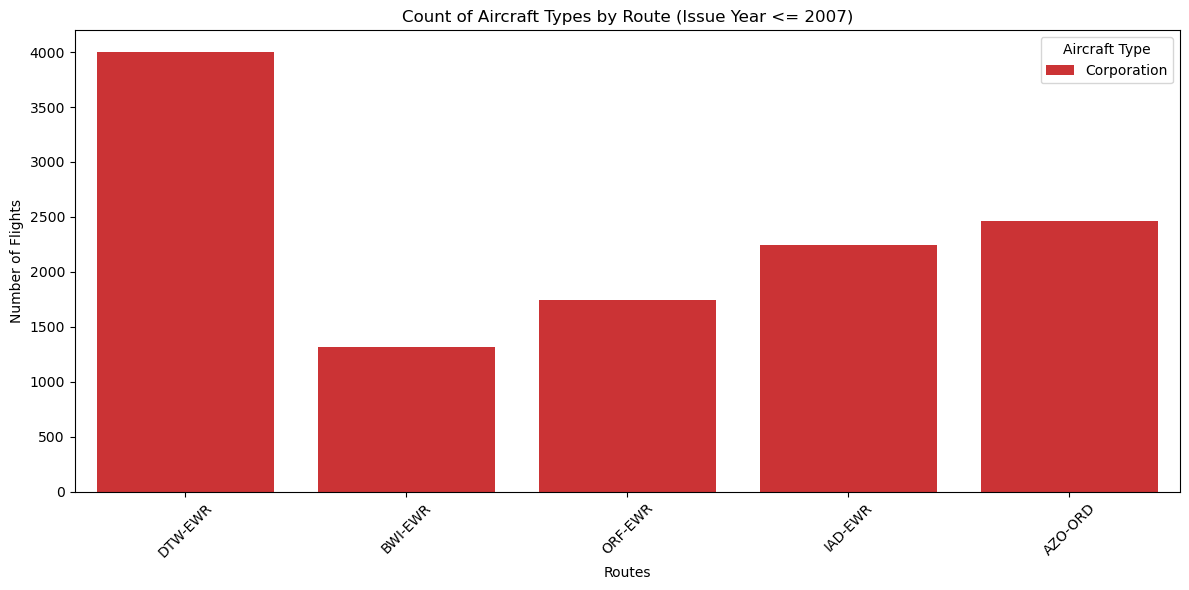

In [40]:
# Plot aircraft type counts by route
plt.figure(figsize=(12, 6))
sns.countplot(data=recent_aircraft_df, x='routes', hue='type', palette='Set1')

plt.title('Count of Aircraft Types by Route (Issue Year <= 2007)')
plt.xlabel('Routes')
plt.ylabel('Number of Flights')
plt.legend(title='Aircraft Type', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
save_plot('count_aircraft_types_by_route')
plt.show()

In the dataset, there are five types of aircraft ownership categories: **Corporation, Co-Owner, Individual, Partnership,** and **Foreign Corporation**. Analyzing the cancellation rates across these ownership types reveals important insights into which types are most associated with flight cancellations.

The bar chart clearly shows that the **majority of flight cancellations originate from aircraft owned by corporations**, such as airline companies operating passenger flights. The route with the highest cancellation rate is DTW–EWR, while the route with the lowest cancellation rate is BWI–EWR. This is a significant finding and suggests several possible interpretations:


1. **Higher Operational Volume:**
   Corporations typically operate larger fleets and manage more flights compared to other ownership types. This naturally increases their exposure to delays and cancellations simply due to scale.

2. **Fleet Usage and Scheduling:**
   Corporate-owned aircraft might be utilized more intensively with tighter schedules and less buffer time between flights. This can increase the likelihood of cascading delays or cancellations if one flight runs late.

3. **Maintenance and Regulatory Factors:**
   Corporations may have different maintenance schedules or operational policies compared to smaller or individual owners. These policies might influence cancellation decisions, especially under conditions such as mechanical issues or regulatory compliance.

4. **Route and Market Differences:**
   Corporate aircraft might operate on more complex, long-haul, or high-traffic routes that are more susceptible to disruptions from weather, air traffic congestion, or other external factors, contributing to higher cancellation rates.

5. **Resource Allocation:**
   In times of operational stress (e.g., adverse weather or staffing shortages), corporations might be more likely to cancel flights to optimize their overall network performance, whereas individuals or smaller operators might manage cancellations differently.


### Contrast with Other Ownership Types

* **Co-Owner, Individual, and Partnership** aircraft show relatively fewer cancellations, which may be due to smaller fleet sizes, less frequent operations, or operating on less congested or shorter routes.
* **Foreign Corporation** aircraft have the least cancellations, which could reflect different operational models or regulatory environments.

### Conclusion

The dominance of cancellations from corporate-owned aircraft highlights the importance of investigating corporate operational practices and fleet management strategies further. Understanding these factors can help airlines and regulators develop targeted interventions to reduce cancellations and improve overall flight reliability.



### Engine Type

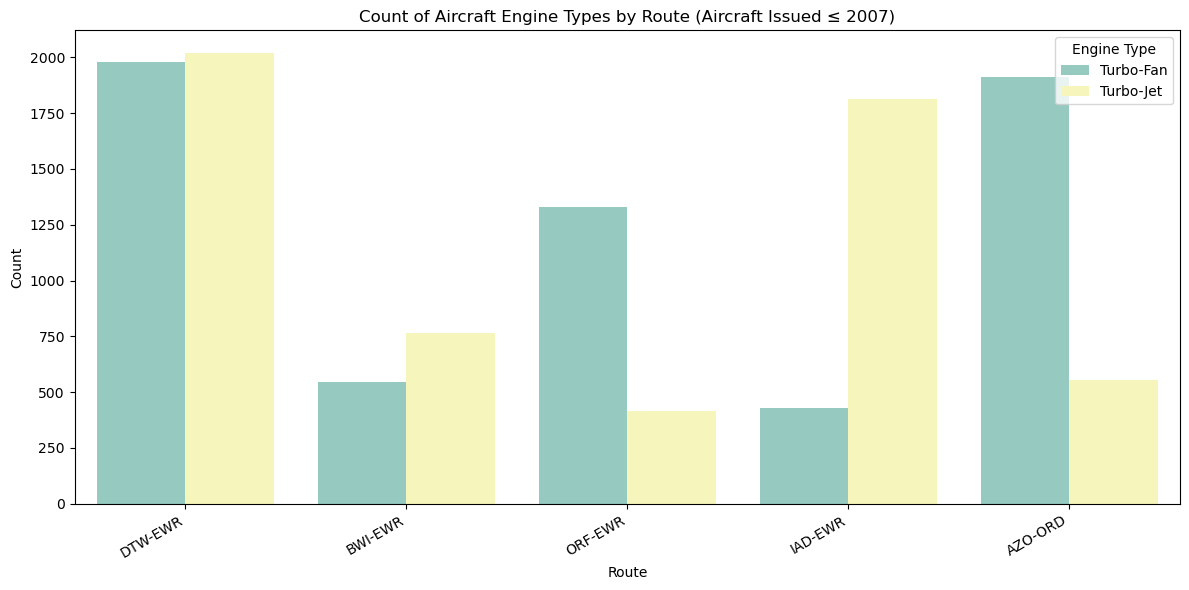

In [38]:
# Plot count of aircraft engine types by route for aircraft issued in or before 2007
plt.figure(figsize=(12, 6))

sns.countplot(
    data=recent_aircraft_df,
    x='routes',
    hue='engine_type',
    palette='Set3'
)

plt.legend(title='Engine Type', loc='upper right')
plt.title('Count of Aircraft Engine Types by Route (Aircraft Issued ≤ 2007)')
plt.xlabel('Route')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

# Save the plot (assuming save_plot is your custom function)
save_plot('count_aircraft_types_by_route_2007_or_earlier')

plt.show()


There are five types of engines observed in the dataset which are **Turbo-Fan, Turbo-Jet, Reciprocating, Turbo-Prop, Turbo-Shaft, and 4 Cycle**. Among the top 5 routes with the highest cancellation rates, only **Turbo-Fan** and **Turbo-Jet** engines are used.

For the routes **DTW-EWR** and **BWI-EWR**, the usage of Turbo-Fan and Turbo-Jet engines is approximately equal. However, for **ORF-EWR** and **AZO-ORD**, Turbo-Fan engines are used more frequently than Turbo-Jet engines. Conversely, on the **IAD-EWR** route, Turbo-Jet engines are used more often than Turbo-Fan engines.

This distribution of engine types could contribute to delays and cancellations due to the operational differences between these engines. Turbo-Fan engines, commonly used in modern commercial jets, typically offer better fuel efficiency and performance, but may require more complex maintenance and are often operated on busier, longer routes that can be more susceptible to delays. Turbo-Jet engines, while older and less fuel-efficient, are often found in faster, high-speed aircraft, but might be affected more by weather and operational constraints.

Therefore, the predominance of these two engine types on high-cancellation routes suggests that **technical complexity, maintenance requirements, and operational demands associated with Turbo-Fan and Turbo-Jet engines might be key factors contributing to the higher rates of delays and cancellations observed on these routes**.


### Year of Manufacture

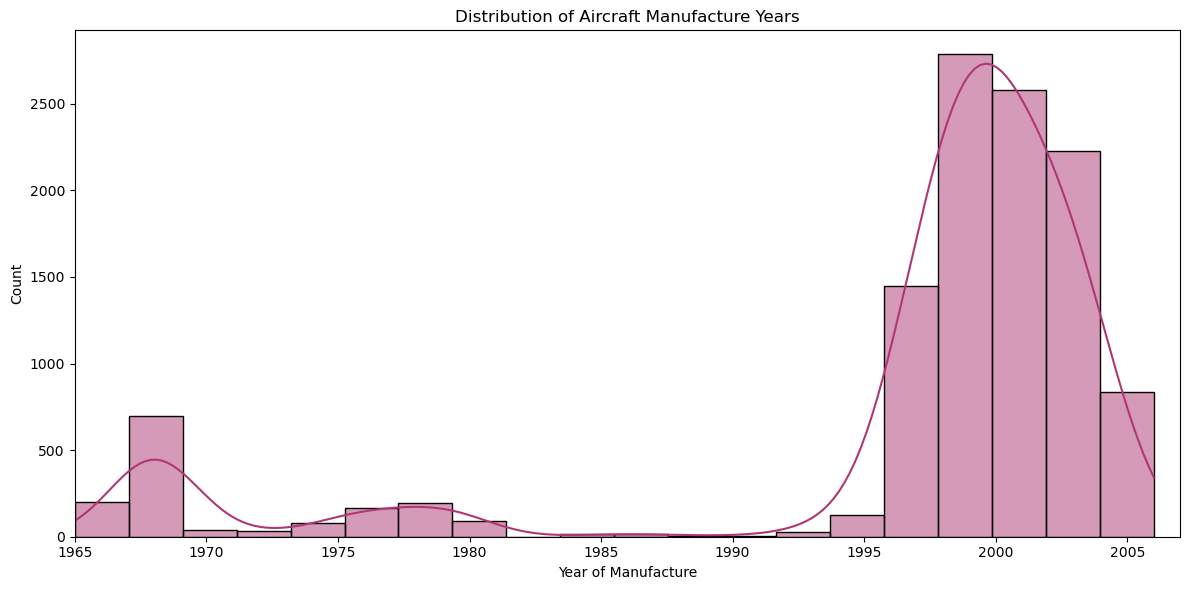

In [37]:
plt.figure(figsize=(12, 6))

# Plot histogram of aircraft manufacture year with KDE
sns.histplot(data=recent_aircraft_df, x='year', bins=20, kde=True, color="#AF3775")

plt.title('Distribution of Aircraft Manufacture Years')
plt.xlabel('Year of Manufacture')

# Set x-axis limits from min year to 2006 (if min year > 2006, fallback to min year)
xmin = recent_aircraft_df['year'].min()
plt.xlim(xmin, 2007 if xmin < 2007 else xmin)

plt.ylabel('Count')
plt.tight_layout()

# Save the plot (use your save_plot function or plt.savefig)
save_plot('aircraft_year_distribution')


plt.show()


The distribution of aircraft manufacturing years for the routes BWI-EWR, AZO-ORD, DTW-EWR, IAD-EWR, and ORF-EWR indicates that the majority of planes servicing these routes are relatively modern. This implies that the age of the aircraft is unlikely to be a significant factor contributing to the observed performance problems. Typically, newer aircraft offer improved reliability, greater fuel efficiency, and lower chances of mechanical failure.

Given this, it is reasonable to conclude that the delays and cancellations on these routes are more likely caused by external factors such as heavy air traffic, adverse weather conditions, operational scheduling conflicts or airport infrastructure limitations, rather than issues related to the aircraft's age or condition. Further investigation into these areas could help identify actionable solutions to improve flight punctuality on these routes.



In [29]:
plane_data['engine_type'].unique()

array([nan, 'Turbo-Fan', 'Turbo-Jet', 'Reciprocating', 'Turbo-Prop',
       'Turbo-Shaft', '4 Cycle'], dtype=object)

In [ ]:
# Save the plot directly here
plt.savefig('plots/top5_routes_cancellation_delay.png', bbox_inches='tight')

In [186]:
print(plane_data.columns.tolist())


['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status', 'aircraft_type', 'engine_type', 'year']


In [187]:
print(data .columns.tolist())

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Code', 'Description']


In [188]:
print(airports.columns.tolist())

['iata', 'airport', 'city', 'state', 'country', 'lat', 'long']


In [189]:
print(carriers.columns.tolist())

['Code', 'Description']


In [ ]:
data = pd.read_csv('data/2007.csv')            # your main flight data
airports = pd.read_csv('data/airports.csv')    # airports info
carriers = pd.read_csv('data/carriers.csv')    # carriers info
plane_data = pd.read_csv('data/plane-data.csv')  

In [4]:
import os

# Change working directory
os.chdir("D:/UKM/Master/2.Data_Management/Assg2/Flight Analysis 2007 P153478 STQD6324")

# Confirm new working directory
print(os.getcwd())


D:\UKM\Master\2.Data_Management\Assg2\Flight Analysis 2007 P153478 STQD6324
